# Intermediate Regression w/stats models

## Parallel Slopes
* Extend your linear regression skills to parallel slopes regression, with one numeric and one categorical explanatory variable. 

### Interpreting the Intercept
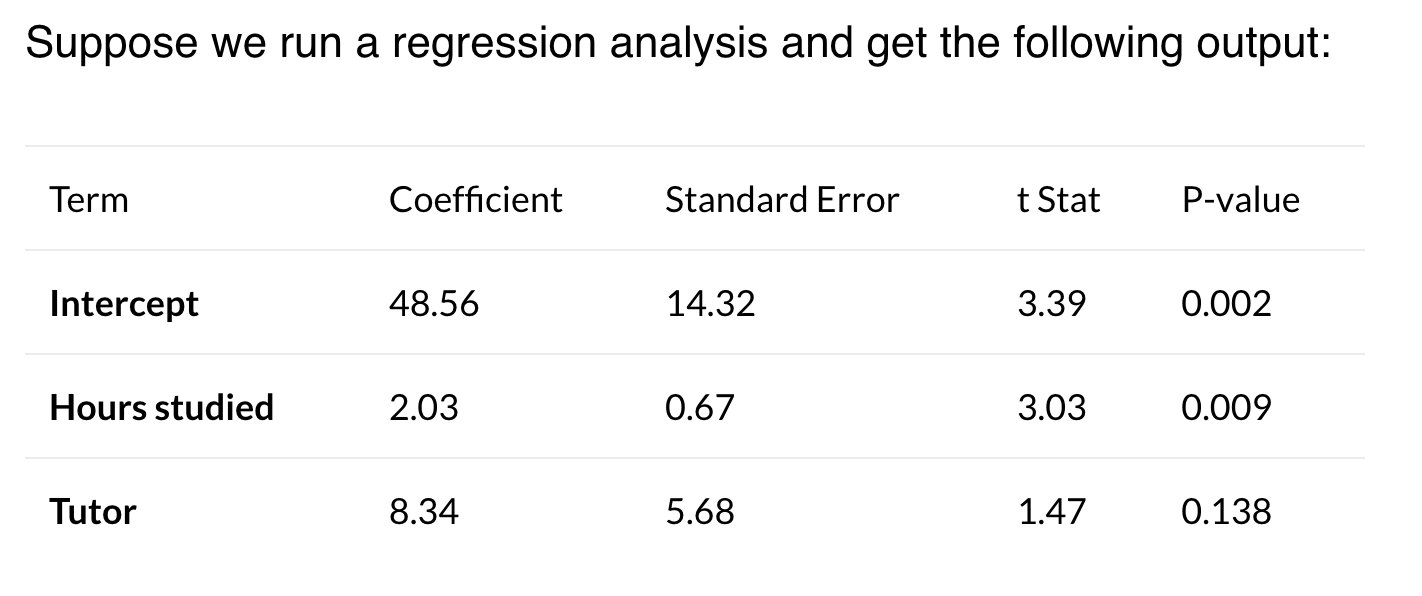

The `intercept` term in a regression table tells us the **average expected value for the response variable** when all of the predictor variables are equal to zero.

* In this example, the regression coefficient for the `intercept` is equal to 48.56. 
    * This means that for a student who studied for zero hours `(Hours studied = 0)` and did not use a tutor `(Tutor = 0)`, the average expected exam score is **48.56**.
    
* In this example, Tutor is a categorical predictor variable that can take on two different values:
    * 1 = the student used a tutor to prepare for the exam
    * 0 = the student did not used a tutor to prepare for the exam
    * From the regression output, we can see that the regression coefficient for Tutor is 8.34. 
        * This means that, on average, a student who used a tutor scored 8.34 points higher on the exam compared to a student who did not used a tutor, assuming the predictor variable Hours studied is held constant.

### interpret-your-continuous-and-categorical-variable-interactions-in-regressions
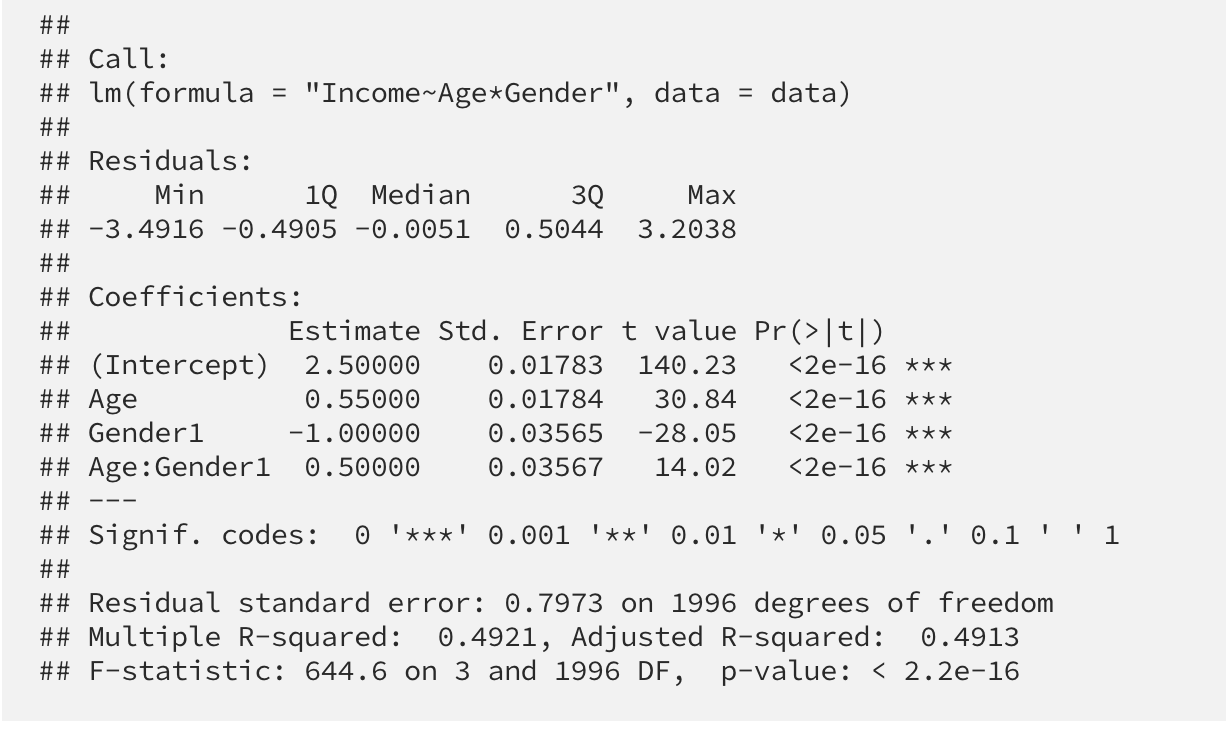
* We get four terms again but they are specified as `Intercept`, `Age`, `Gender1`, and `Age:Gender1`. 
* The `Age` effect is 0.55 which is exactly the **average effect across gender as we specified when we generated our data ( 0.55=(0.8+0.3) / 2)**. 
* The `Age:Gender1` **interaction** is 0.5 which is the `difference between the age effects between gender` (0.5 =0.8–0.3). 
* Effect of `Gender1` is \\$-1 which represents the average difference between the two genders (\\$2-\\$3), as specified by our contrast. 
* The reference `Intercept` is \\$2.5 which is the average income across gender ( (\\$2+\\$3) / 2 ).


In [1]:
import pandas as pd
from statsmodels.formula.api import ols

taiwan_real_estate = pd.read_csv('../Datasets/taiwan_real_estate2.csv')
taiwan_real_estate.head()

dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
0       84.87882             10        30 to 45      11.467474
1      306.59470              9        15 to 30      12.768533
2      561.98450              5         0 to 15      14.311649
3      561.98450              5         0 to 15      16.580938
4      390.56840              5         0 to 15      13.040847

In [2]:
# Fit a linear regression of price_twd_msq vs. n_convenience
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


* In Chapter 1, you'll explore `parallel slopes linear regression`. 
    * This is a special case of multiple linear regression, with one **numeric explanatory variable** and one **categorical explanatory variable**.
* Recall that when you have a **categorical explanatory variable** (like house_age_years below), the coefficients are a little easier to understand if you use **"plus zero"** to tell statsmodels not to include an intercept in the model.
    * `1 Intercept Value` for each categorical value

In [3]:
# Fit a linear regression of price_twd_msq vs. house_age_years, no intercept
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


#### Both Variables (Explanatory Categorical and Continous) At Same Time
* 1 slope coefficient
* 1 intercept coefficient for each category

In [4]:
# Fit a linear regression of price_twd_msq vs. n_convenience plus house_age_years, no intercept
mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years + 0', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both.params)

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


### Interpreting parallel slopes coefficients
* For linear regression w/a `single` numeric explanatory variable, there is an intercept coefficient and a slope coefficient.
* For linear regression w/a `single` categorical explanatory variable, there is an intercept coefficient for each category
* The model has one slope coefficient, and three intercept coefficients (one for each possible value of the categorical explanatory variable).

1. Looking at the coefficient of the model above, what is the meaning of the n_convenience coefficient
    - For each additional nearby convenience store, the expected house price, in TWD per square meter, increases by 0.79.
    
2. What is the meaning of the "0 to 15 years" coefficient?
    - For a house aged 0 to 15 years with zero nearby convenience stores, the expected house price is 9.41 TWD per square meter.

### Visualizing each explanatory variable
* To visualize the relationship between a `numeric explanatory variable` and the `numeric response`, you can draw a **scatter plot with a linear trend line**.

* To visualize the relationship between a `categorical explanatory variable` and the `numeric response`, you can draw a **box plot**.

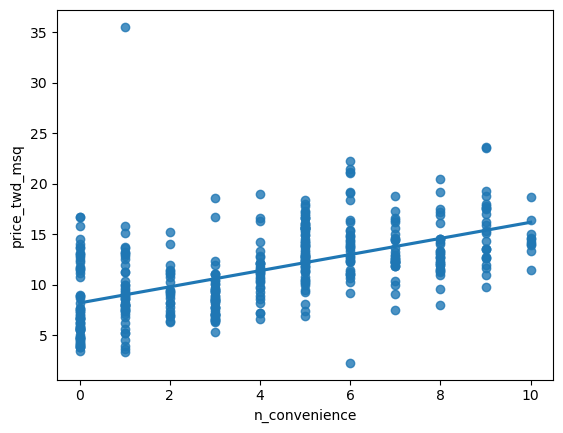

In [5]:
# Import matplotlib.pyplot and seaborn
import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot with linear trend line of price_twd_msq vs. n_convenience
sns.regplot(data=taiwan_real_estate, x='n_convenience', y='price_twd_msq', ci=None)

# Show the plot
plt.show()

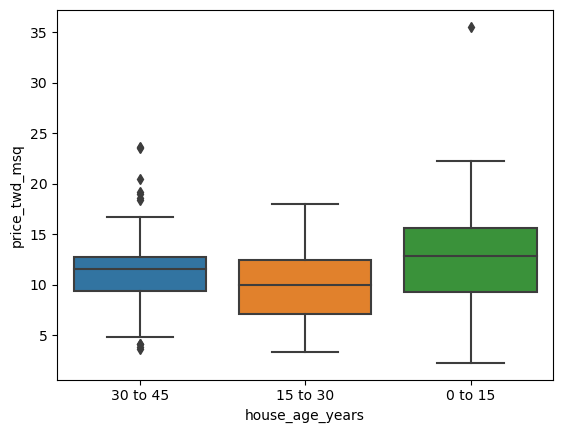

In [6]:
# Create a boxplot of price_twd_msq vs. house_age_years
sns.boxplot(data=taiwan_real_estate, x='house_age_years', y='price_twd_msq')

# Show the plot
plt.show()

* With a single numeric explanatory variable, the predictions form a single straight line. 
* With a single categorical explanatory variable, the predictions are the means of each category.

### Visualizing parallel slopes
* The two plots in the previous exercise gave very different predictions: one gave a predicted response that increased linearly with a numeric variable; the other gave a fixed response for each category. 
* The only sensible way to reconcile these two conflicting predictions is to incorporate both explanatory variables in the model at once.

In [7]:
mdl_price_vs_both.params

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64

In [8]:
type(mdl_price_vs_both.params), len(mdl_price_vs_both.params)

(pandas.core.series.Series, 4)

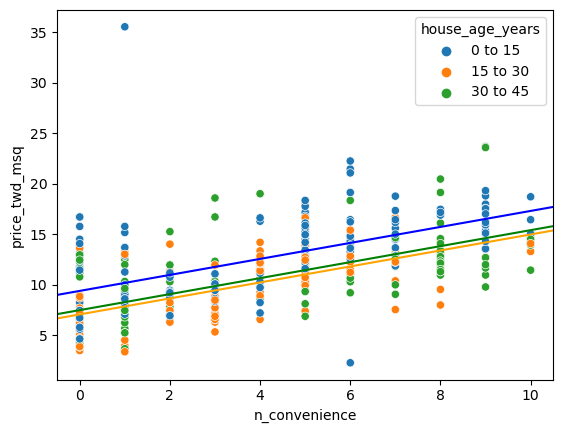

In [9]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params

# Assign each of the coeffs, can simply unpack the length of pandas series similar to tuple unpacking
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Draw a scatter plot of price_twd_msq vs. n_convenience, colored by house_age_years
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                hue_order=['0 to 15', '15 to 30', '30 to 45'],
                data=taiwan_real_estate)

# Add three parallel lines for each category of house_age_years
# For each line, the x-coordinate in xy1 is 0, and the y-coordinate should be the intercept for that category.

# Color the line for ic_0_15, slope is assigned to continous number or n_convenience in the series above 
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")

# Color the line for ic_15_30
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")

# Color the line for ic_30_45 
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")

# Show the plot
plt.show()

* The `"parallel slope"` model name comes from the fact that the **prediction** for each category is a `slope`, and **all those `slopes` are parallel**. 
* The plot allows us to see that newer houses are on average more expensive than houses older than 15 years

### Predicting Parallel Slopes

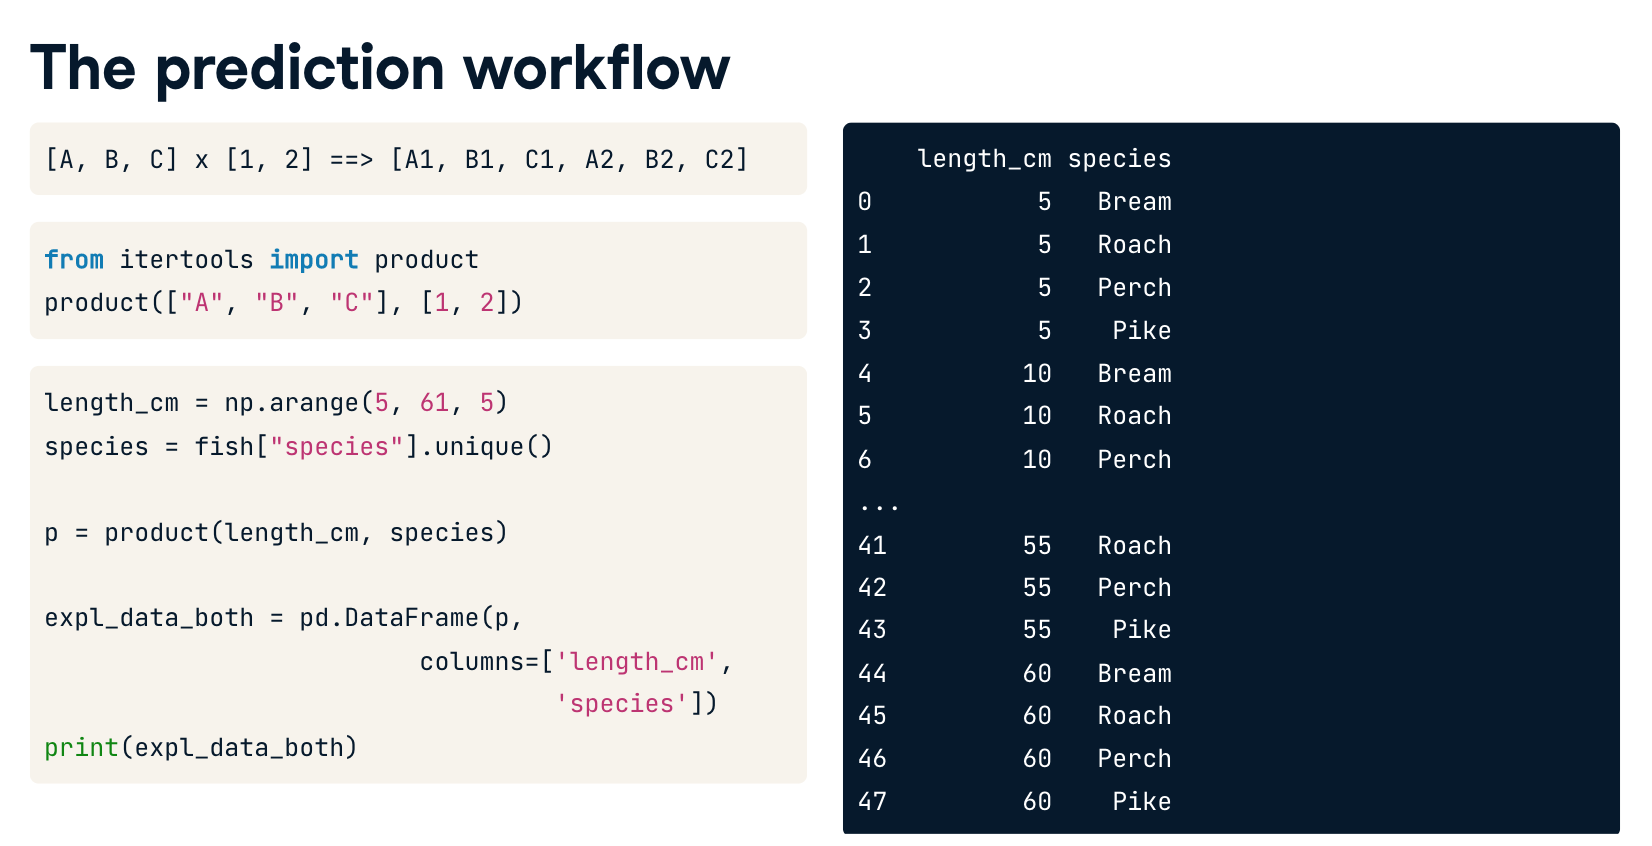
* For multiple explanatory variables, you need to define multiple columns in your explanatory DataFrame. 
* Say for example, that you would like to create a DataFrame that holds all combinations of A, B, and C, and the numbers 1 and 2. 
    * You could manually create such a DataFrame, but this would be cumbersome and not scalable for more than two explanatory variables. 
* A useful trick to create such a DataFrame is to use the `product` function from the itertools module. 
    * The product function returns a Cartesian product of your input variables. 
    * In other words, it outputs all combinations of its inputs. 
* Let's apply this to our fish dataset. 
    * You first create your explanatory variable lists. 
    * For a categorical variable, we use pandas' unique method.
    * The product function then creates a combination of all of the elements of these input lists. 
    * Lastly, you transform the output of the product function into a pandas DataFrame, and name the columns. Here, you have 5cm and each fish species, 10cm and each fish species, all the way to 60cm and each fish species.

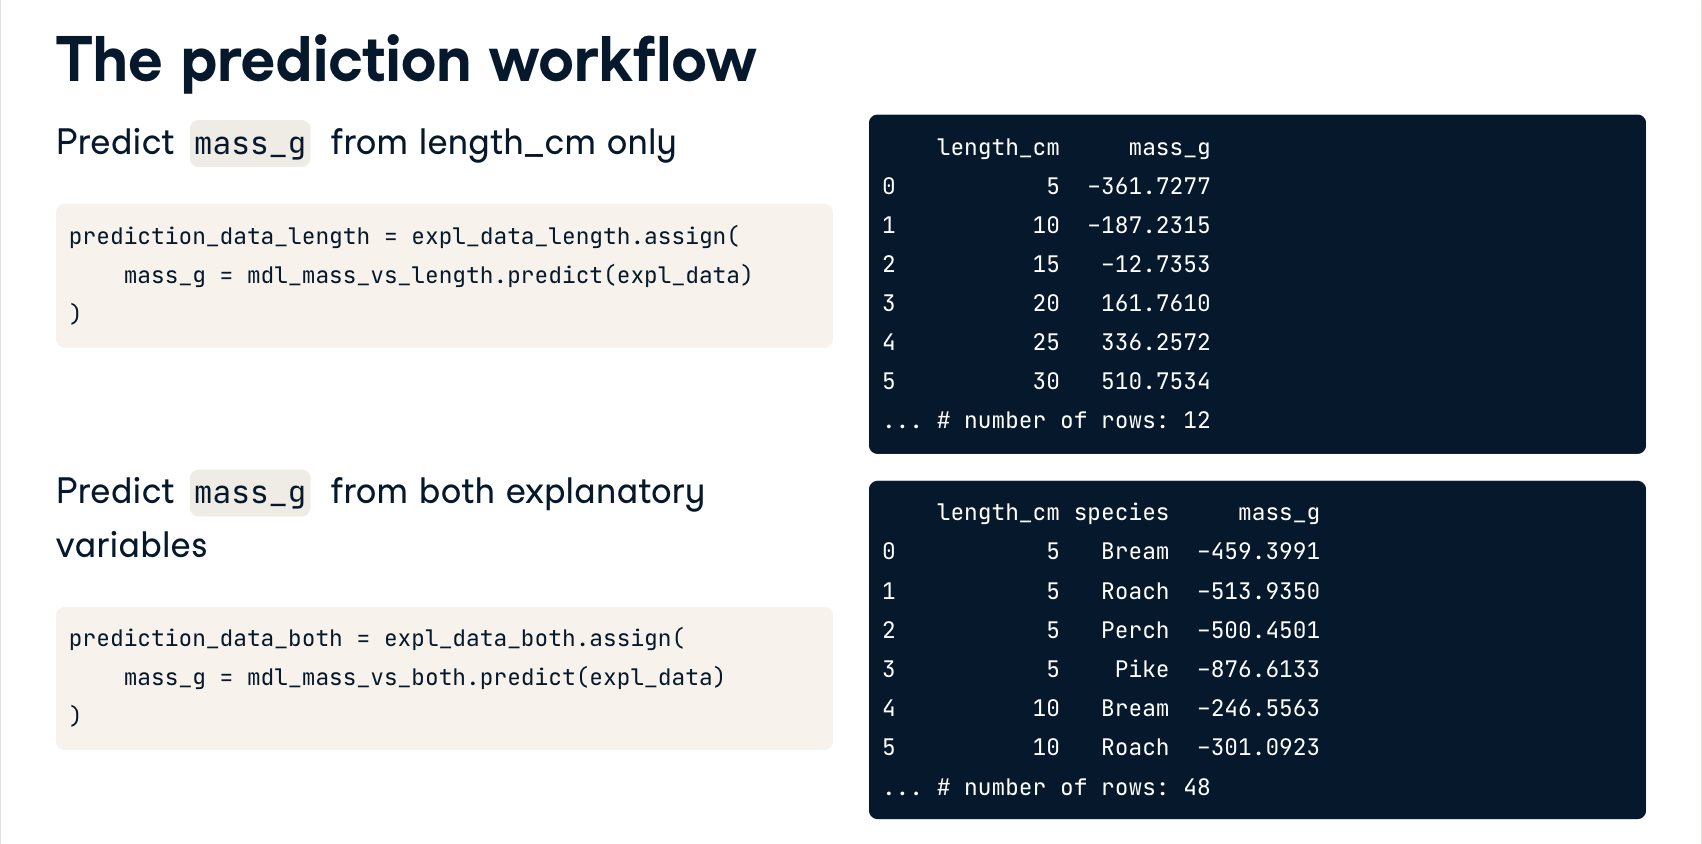

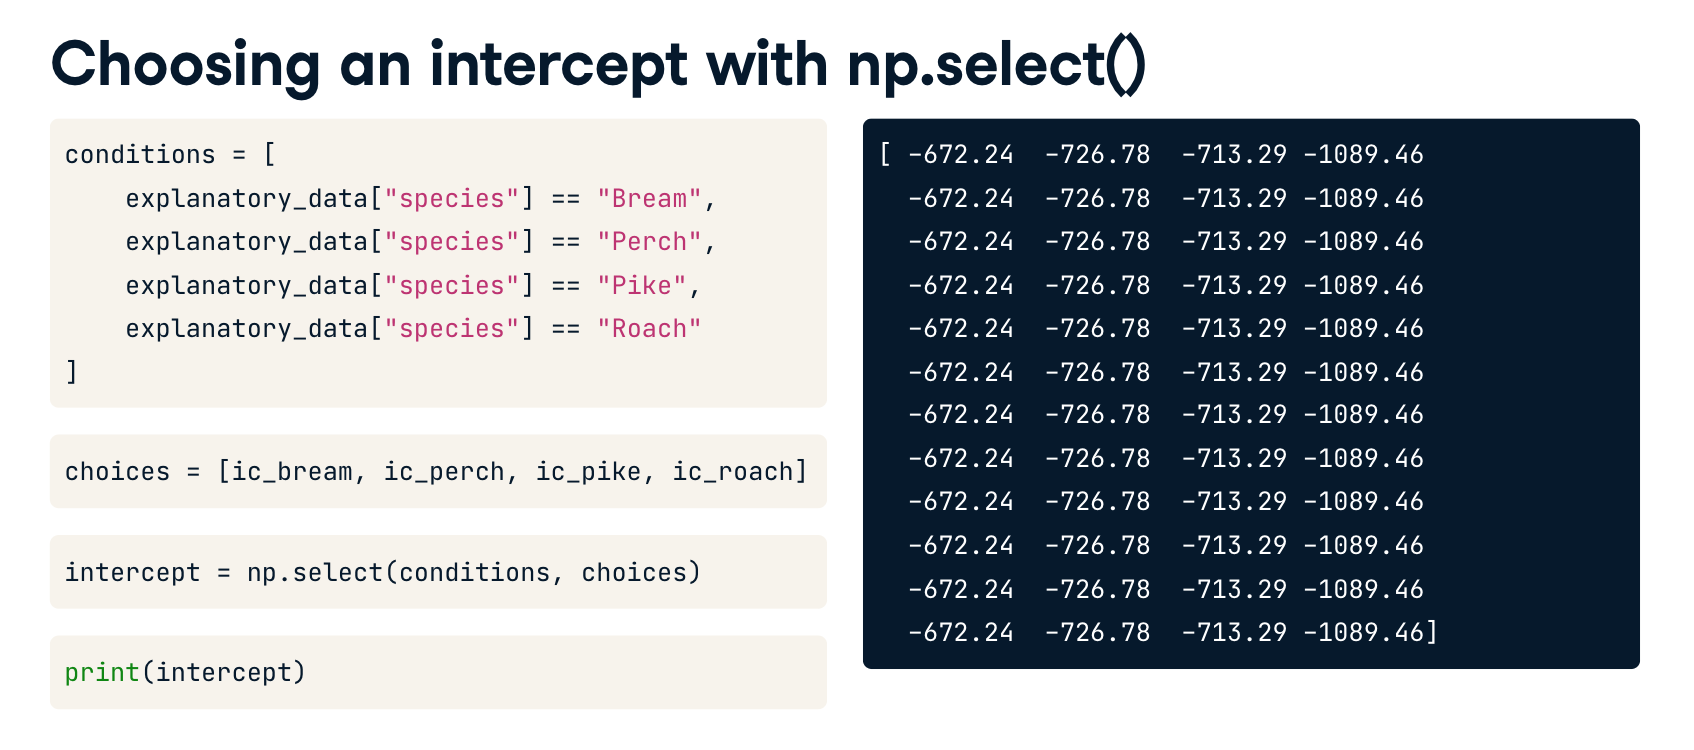
* The conditions list contains a condition statement for each species. 
    * It returns a True of False whether the species is Bream, Perch, Pike, or Roach. 
* The choices list is the collection of `intercepts` that were extracted from the model coefficients. Recall that both lists have to contain the same number of elements. 
* `np dot select` will then retrieve the corresponding intercept for each of the fish species. 
* Since our explanatory dataset contained 48 rows of data (12 for each fish species), the output will contain 48 intercepts as well.
* Notice the recurring pattern in the intercepts, corresponding to the repeating fish species.

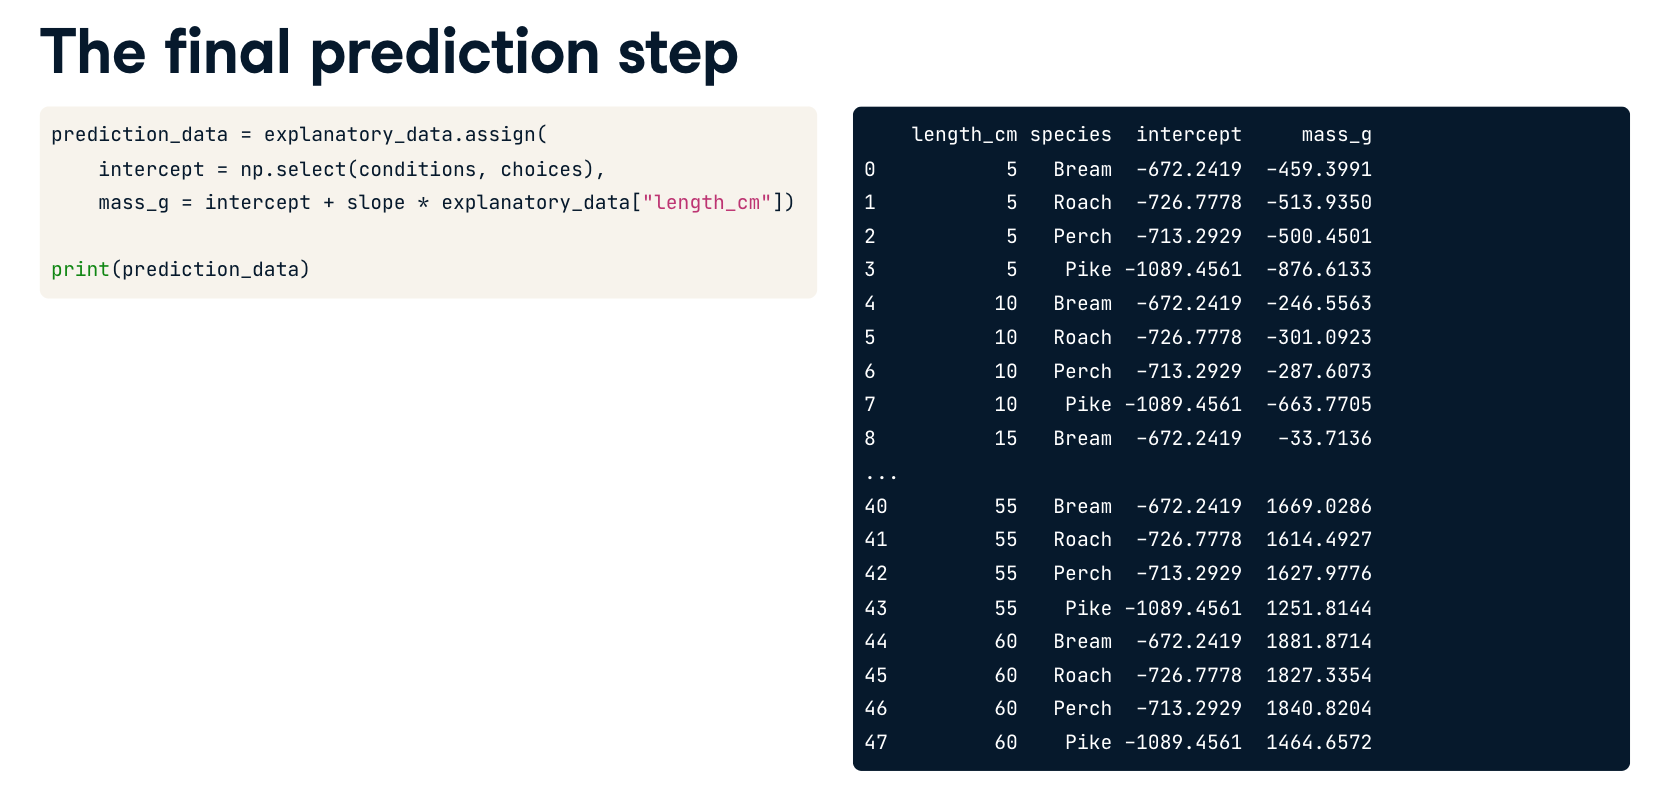
* The final step is to calculate the response. 
* As before, the `response` is the `intercept plus the slope times the numeric explanatory variable`. This time, the intercept is different for different rows.

### Predicting W/Parallel Slopes Model and Visualizing Slopes Model Predictions

In [10]:
## Predicting with a parallel slopes model
from itertools import product
import numpy as np

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = sorted(taiwan_real_estate['n_convenience'].unique())
print(sorted(taiwan_real_estate['n_convenience'].unique()))

# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()

# Create p as all combinations of values of n_convenience and house_age_years
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

display(explanatory_data.head())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


n_convenience house_age_years
0              0        30 to 45
1              0        15 to 30
2              0         0 to 15
3              1        30 to 45
4              1        15 to 30

In [11]:
# Add a column to explanatory_data named price_twd_msq containing the predictions made 
# using mdl_price_vs_both and explanatory_data. Assign the result to prediction_data.

# Model was declared above (predict appears to work as long as the explanatory df (df predictions match explanatory variables used in model))
# mdl_price_vs_both = ols('price_twd_msq ~ n_convenience + house_age_years + 0', data=taiwan_real_estate).fit()



prediction_data = explanatory_data.assign(
            price_twd_msq = mdl_price_vs_both.predict(explanatory_data)
)
prediction_data.head()

n_convenience house_age_years  price_twd_msq
0              0        30 to 45       7.510958
1              0        15 to 30       7.085169
2              0         0 to 15       9.413325
3              1        30 to 45       8.302415
4              1        15 to 30       7.876627

* To make sure you've got the right predictions from the previous exercise, you can add them to a seaborn plot. 
* To visualize multiple regression predictions, you use the same procedure as with linear regression: draw a scatter plot with a trend line and add a second layer of prediction points on the same plot.

house_age_years[0 to 15]     9.413325
house_age_years[15 to 30]    7.085169
house_age_years[30 to 45]    7.510958
n_convenience                0.791457
dtype: float64


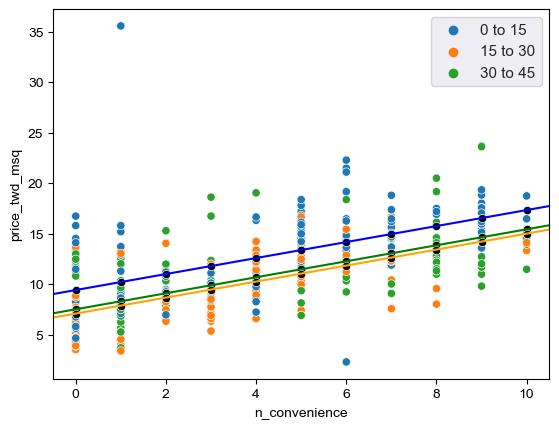

In [12]:
## Visualizing parallel slopes model predictions

# Reminder of different categorical intercepts
print(mdl_price_vs_both.params)

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                hue_order=['0 to 15', '15 to 30', '30 to 45'],
                data=taiwan_real_estate)

# Add the predictions in black
sns.set(rc={'figure.figsize':(15,12)})
sns.scatterplot(x='n_convenience',
               y='price_twd_msq',
               color='black',
               data=prediction_data)

plt.show()

### Manually calculating predictions
* As with simple linear regression, you can also manually calculate the predictions from the model coefficients. 
* The only change for the parallel slopes case is that the intercept is different for each category of the categorical explanatory variable. 
    * That means you need to consider the case when each category occurs separately.

In [13]:
# Define conditions
conditions = [
    explanatory_data["house_age_years"] == "0 to 15",
    explanatory_data["house_age_years"] == "15 to 30",
    explanatory_data["house_age_years"] == "30 to 45"]

# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]

# Create array of intercepts for each house_age_year category (matches values in the conditions to corresponding intercept value for each category (saved in choices list))
intercept = np.select(conditions, choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    intercept = intercept,
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"])

print(prediction_data)

    n_convenience house_age_years  intercept  price_twd_msq
0               0        30 to 45   7.510958       7.510958
1               0        15 to 30   7.085169       7.085169
2               0         0 to 15   9.413325       9.413325
3               1        30 to 45   7.510958       8.302415
4               1        15 to 30   7.085169       7.876627
5               1         0 to 15   9.413325      10.204782
6               2        30 to 45   7.510958       9.093873
7               2        15 to 30   7.085169       8.668084
8               2         0 to 15   9.413325      10.996239
9               3        30 to 45   7.510958       9.885330
10              3        15 to 30   7.085169       9.459541
11              3         0 to 15   9.413325      11.787696
12              4        30 to 45   7.510958      10.676787
13              4        15 to 30   7.085169      10.250998
14              4         0 to 15   9.413325      12.579153
15              5        30 to 45   7.51

* Even for more complicated linear regression models, the prediction just involves adding and multiplying coefficients for different conditions of explanatory variables.

### Assessing model performance

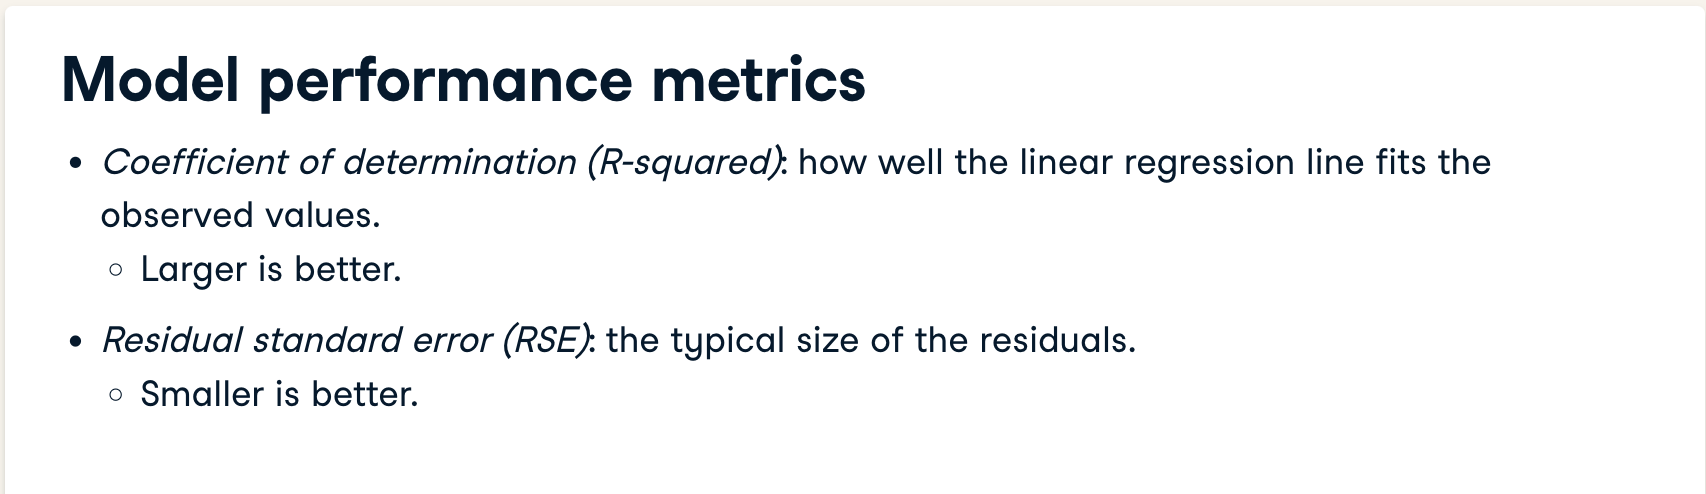

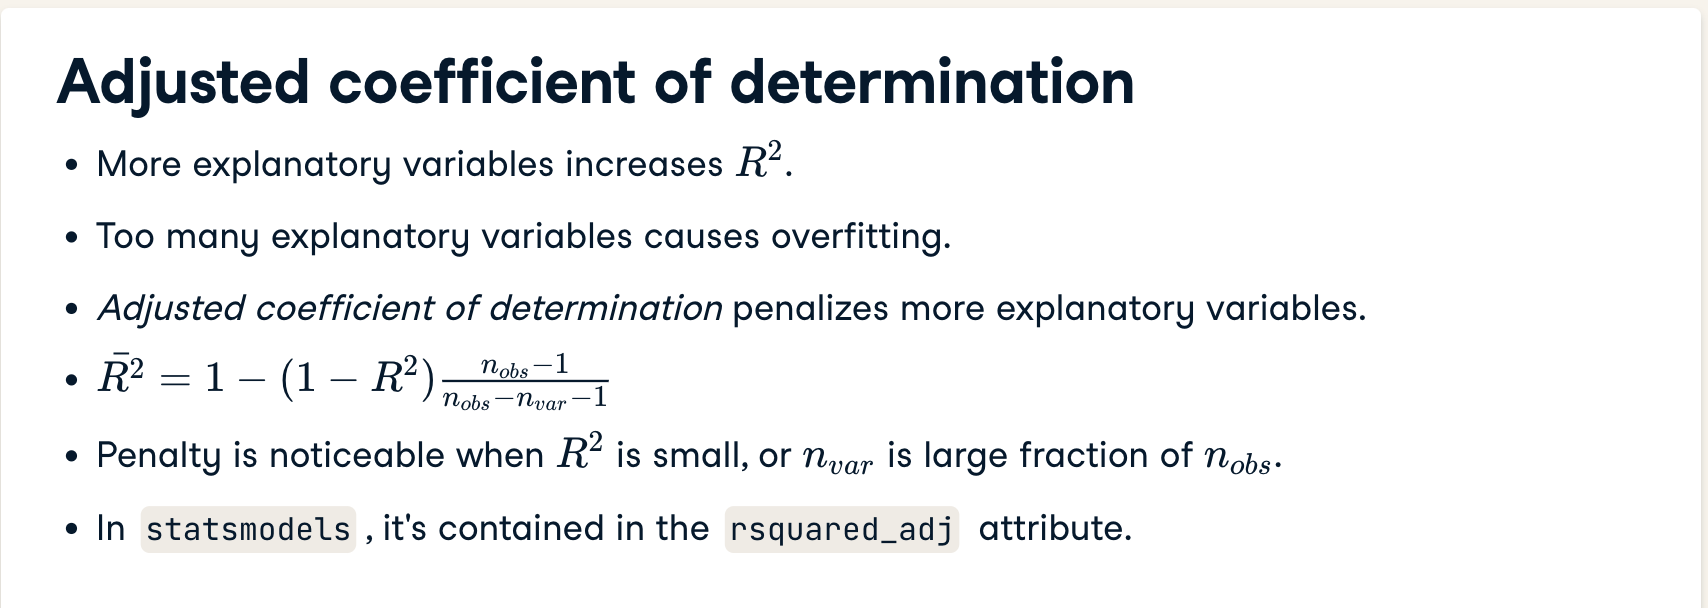

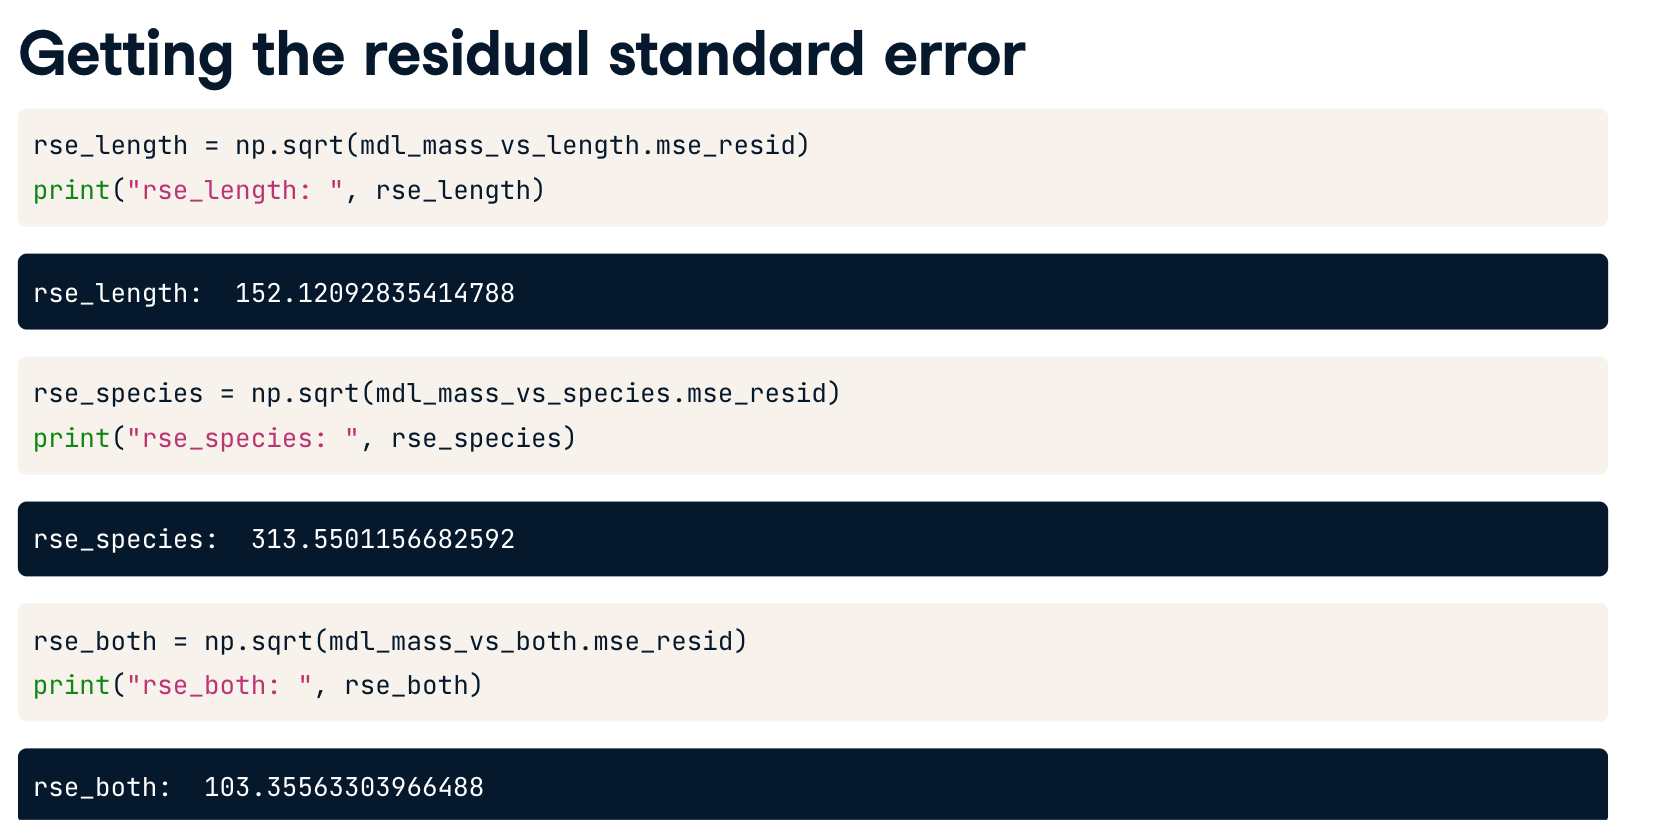
* The code to get the residual standard error is the same as before. 
    * RSE isn't directly available as an attribute, but the MSE is. 
* Recall that the `MSE` is the mean squared error. Consequently, you take the square root of the mse_resid attribute to get the RSE. 
* The mass versus length model has an RSE of just over one hundred fifty. 
* The mass versus species model has an RSE of about three hundred and thirteen. 
* Finally, the mass versus both model has an RSE of just over one hundred, meaning that it typically gets the mass wrong by about one hundred grams. 
* Since that number is the lowest of the three, by this metric, the mass versus both model is best. That means that all metrics indicate that the model with two explanatory variables is better than the models with just one explanatory variable.

### Comparing Coefficients of Determination


In [14]:
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)

rsquared_conv:  0.32604660851305045
rsquared_adj_conv:  0.32441079931041217
rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rsquared_both:  0.39517387968887374
rsquared_adj_both:  0.3907483227109875


* When both explanatory variables are included in the model, the adjusted coefficient of determination is higher, resulting in a better fit.

### Comparing residual standard error
The other common metric for assessing model fit is the residual standard error `(RSE)`, which measures the typical size of the residuals.

In [15]:
# Print the RSE for mdl_price_vs_conv
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid))

# Print the RSE for mdl_price_vs_age
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid))

# Print RSE for mdl_price_vs_both
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rse_conv:  3.383887521343046
rse_age:  3.950183875630859
rse_both:  3.213460280552323


* By including both explanatory variables in the model, a lower RSE was achieved, indicating a smaller difference between the predicted responses and the actual responses.

## Models for each category

* Similar prediction flow, however a separate instance of a linear regression model was made for each category and then the dataframes holding the category predictions were combined `pd.concat` to put all the predictions in one dataframe for the subsequent plot. The explanatory numeric varaible `length_cm` was the same set of values for each prediction
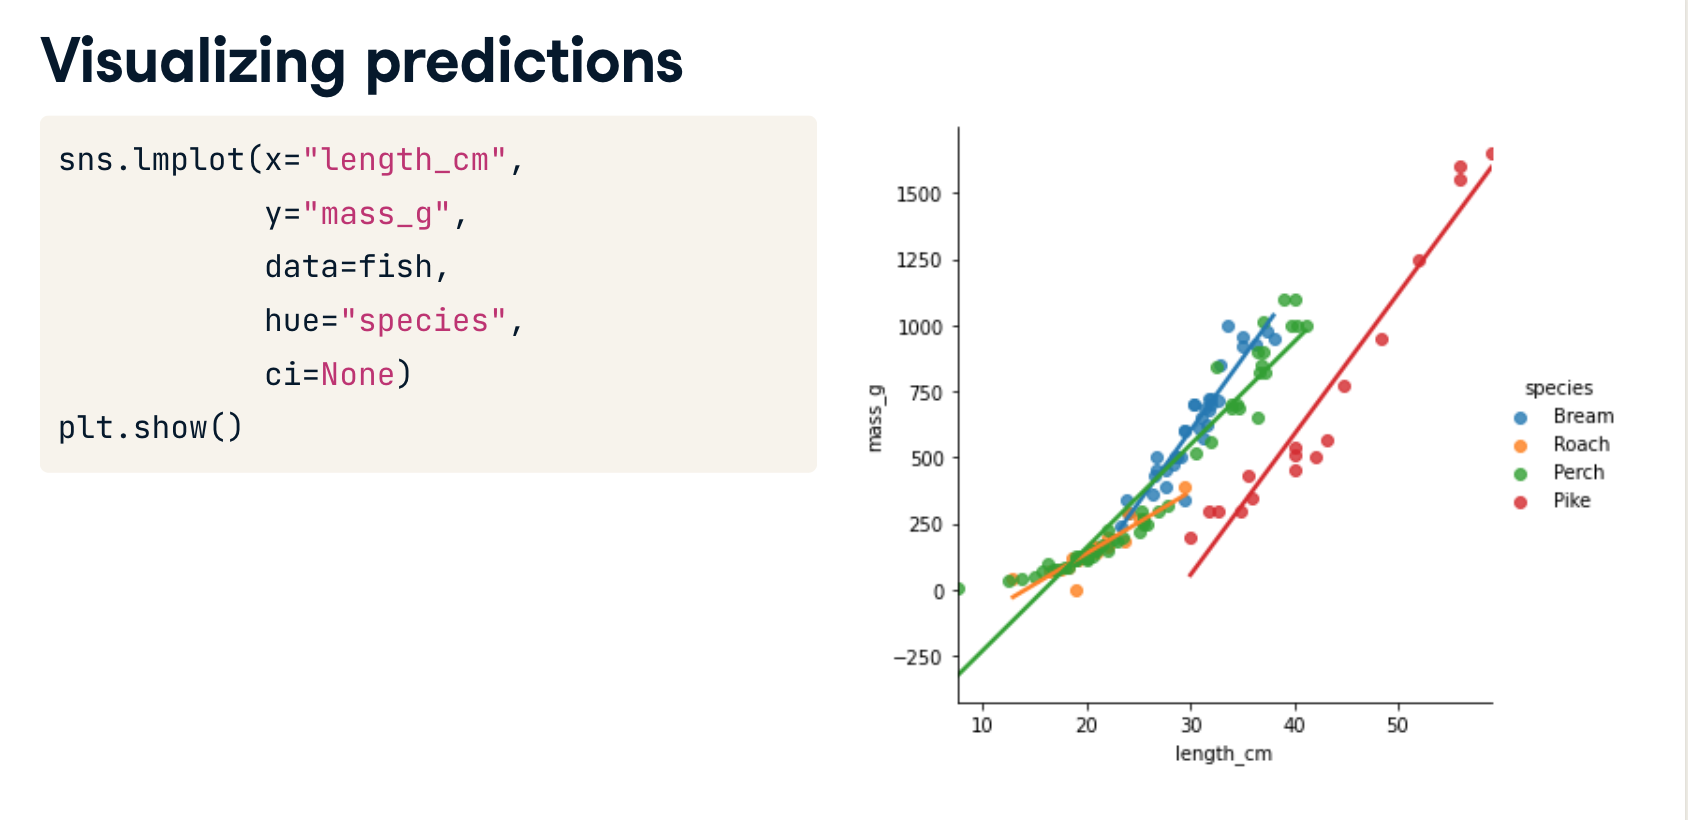

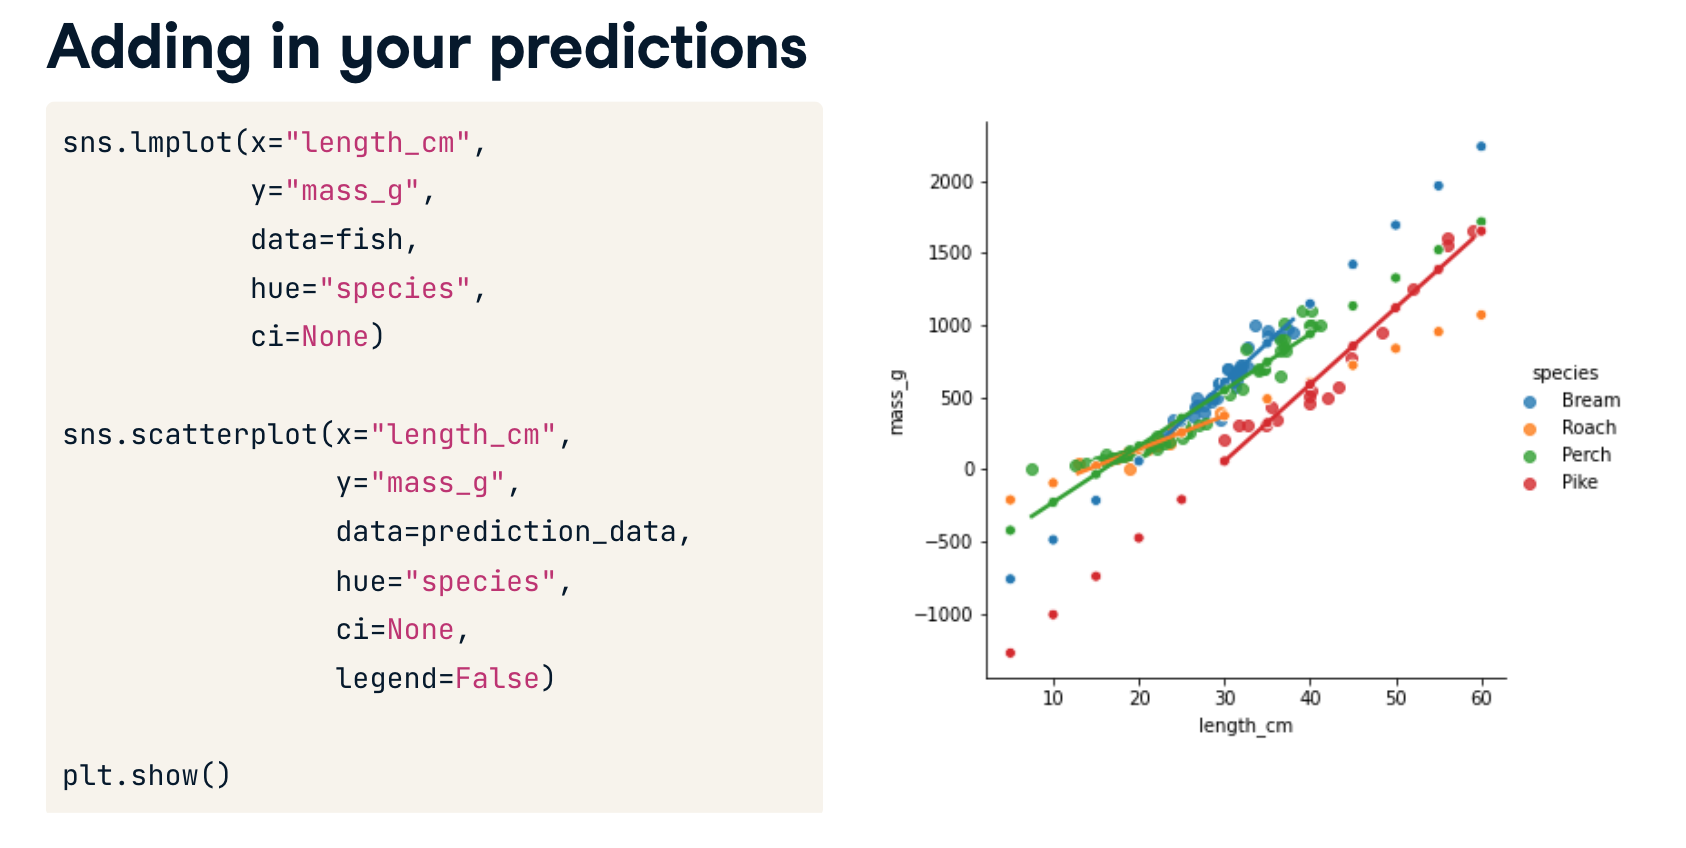

#### One model per category
The model you ran on the whole dataset fits some parts of the data better than others. It's worth taking a look at what happens when you run a linear model on different parts of the dataset separately, to see if each model agrees or disagrees with the others.

In [16]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate.loc[taiwan_real_estate['house_age_years'] == '0 to 15']

# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate.loc[taiwan_real_estate['house_age_years'] == '15 to 30']

# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate.loc[taiwan_real_estate['house_age_years'] == '30 to 45']

In [17]:
taiwan_0_to_15.head()

dist_to_mrt_m  n_convenience house_age_years  price_twd_msq
2       561.98450              5         0 to 15      14.311649
3       561.98450              5         0 to 15      16.580938
4       390.56840              5         0 to 15      13.040847
5      2175.03000              3         0 to 15       9.712557
11       90.45606              9         0 to 15      17.579425

* Create model instances and fit 

In [18]:
# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols('price_twd_msq ~ n_convenience', data=taiwan_0_to_15).fit()

# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols('price_twd_msq ~ n_convenience', data=taiwan_15_to_30).fit()

# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols('price_twd_msq ~ n_convenience', data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


In [19]:
# Create DFrame with n_convenience containing the number zero to ten
explanatory_data = pd.DataFrame(
        {'n_convenience' : sorted(list(taiwan_real_estate['n_convenience'].unique()))}
)
# explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)}) (could of worked also)

* `dataframe.assign` returns a new object with all original columns in addition to new ones. 
    * Existing columns that are re-assigned will be overwritten.
    * Each call with the explanatory dataframe will simply return a new dataframe which then is assigned to a different variable name

In [20]:
# Add column of predictions using "0 to 15" model and explanatory data 
# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign(
    price_twd_msq = mdl_0_to_15.predict(explanatory_data),
    house_age_years = '0 to 15')

# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign(
    price_twd_msq = mdl_15_to_30.predict(explanatory_data),
    house_age_years = '15 to 30')

# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign(
    price_twd_msq = mdl_30_to_45.predict(explanatory_data),
    house_age_years = '30 to 45')

display(prediction_data_0_to_15)
display(prediction_data_15_to_30)
display(prediction_data_30_to_45)

n_convenience  price_twd_msq house_age_years
0               0       9.241702         0 to 15
1               1      10.075289         0 to 15
2               2      10.908876         0 to 15
3               3      11.742462         0 to 15
4               4      12.576049         0 to 15
5               5      13.409636         0 to 15
6               6      14.243222         0 to 15
7               7      15.076809         0 to 15
8               8      15.910396         0 to 15
9               9      16.743982         0 to 15
10             10      17.577569         0 to 15

n_convenience  price_twd_msq house_age_years
0               0       6.871919        15 to 30
1               1       7.723836        15 to 30
2               2       8.575753        15 to 30
3               3       9.427670        15 to 30
4               4      10.279588        15 to 30
5               5      11.131505        15 to 30
6               6      11.983422        15 to 30
7               7      12.835339        15 to 30
8               8      13.687257        15 to 30
9               9      14.539174        15 to 30
10             10      15.391091        15 to 30

n_convenience  price_twd_msq house_age_years
0               0       8.113123        30 to 45
1               1       8.781822        30 to 45
2               2       9.450520        30 to 45
3               3      10.119218        30 to 45
4               4      10.787916        30 to 45
5               5      11.456614        30 to 45
6               6      12.125312        30 to 45
7               7      12.794010        30 to 45
8               8      13.462709        30 to 45
9               9      14.131407        30 to 45
10             10      14.800105        30 to 45

In [21]:
explanatory_data # note here as no new columns exists but rather the assign returns a new dataframe

n_convenience
0               0
1               1
2               2
3               3
4               4
5               5
6               6
7               7
8               8
9               9
10             10

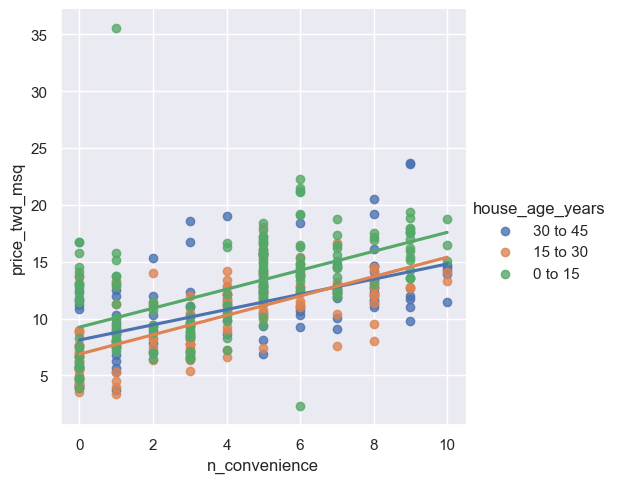

In [22]:
# Visualizing multiple models
sns.lmplot(x='n_convenience',
          y='price_twd_msq',
          data=taiwan_real_estate,
          hue='house_age_years',
          ci=None)
plt.show()

In [23]:
# Concatenate dataframes
prediction_data = pd.concat([prediction_data_0_to_15, prediction_data_15_to_30,prediction_data_30_to_45])
prediction_data.head(), prediction_data.shape

(   n_convenience  price_twd_msq house_age_years
 0              0       9.241702         0 to 15
 1              1      10.075289         0 to 15
 2              2      10.908876         0 to 15
 3              3      11.742462         0 to 15
 4              4      12.576049         0 to 15,
 (33, 3))

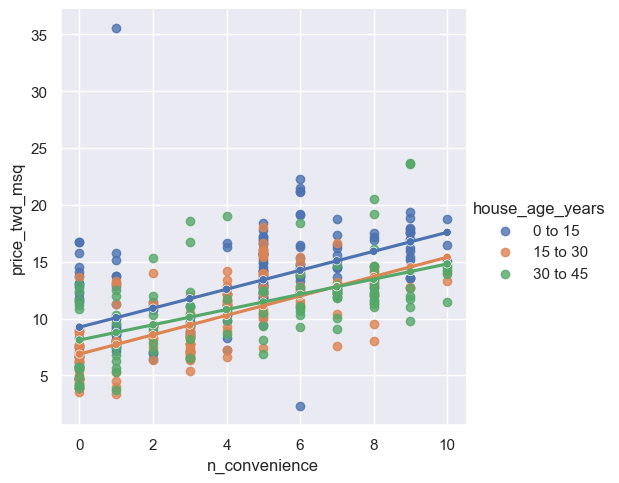

In [25]:
# Add predictions 
sns.lmplot(x='n_convenience',
          y='price_twd_msq',
          data=taiwan_real_estate,
          hue='house_age_years',
          hue_order = ['0 to 15', '15 to 30', '30 to 45'],
          ci=None)

sns.scatterplot(data=prediction_data, 
                x='n_convenience', 
                y='price_twd_msq', 
                hue='house_age_years',
                hue_order = ['0 to 15', '15 to 30', '30 to 45'],
                legend=False)

plt.show()

In [29]:
# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)

R-squared for mdl_0_to_15:  0.3120536339435179
R-squared for mdl_15_to_30:  0.4424604869682425
R-squared for mdl_30_to_45:  0.3125713334387281


In [30]:
# Print the RSE for mdl_0_to_15
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid))

# Print the RSE for mdl_15_to_30
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))

# Print the RSE for mdl_30_to_45
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))

RSE for mdl_0_to_15:  3.5641269936319704
RSE for mdl_15_to_30:  2.585272870907339
RSE for mdl_30_to_45:  3.239037479434981


### One model with an interaction
* Messing about with different models for different bits of your dataset is a pain. 
* A better solution is to specify a single model that contains intercepts and slopes for each category. 
    * This is achieved through specifying `interactions between explanatory variables`.

#### Interaction
* To understand the idea of `interactions` between explanatory variables, consider what we know about the fish dataset. 
* Different fish species have different mass to length ratios. 
* In statistical terms, we can say that the effect that length has on the expected mass of the fish varies between species. 
    * That means that length and species interact. 
    * More generally, if the effect of one explanatory variable on the expected response has different values dependent on the values of another explanatory variable, then those two explanatory variables interact.

### Specifying Interactions
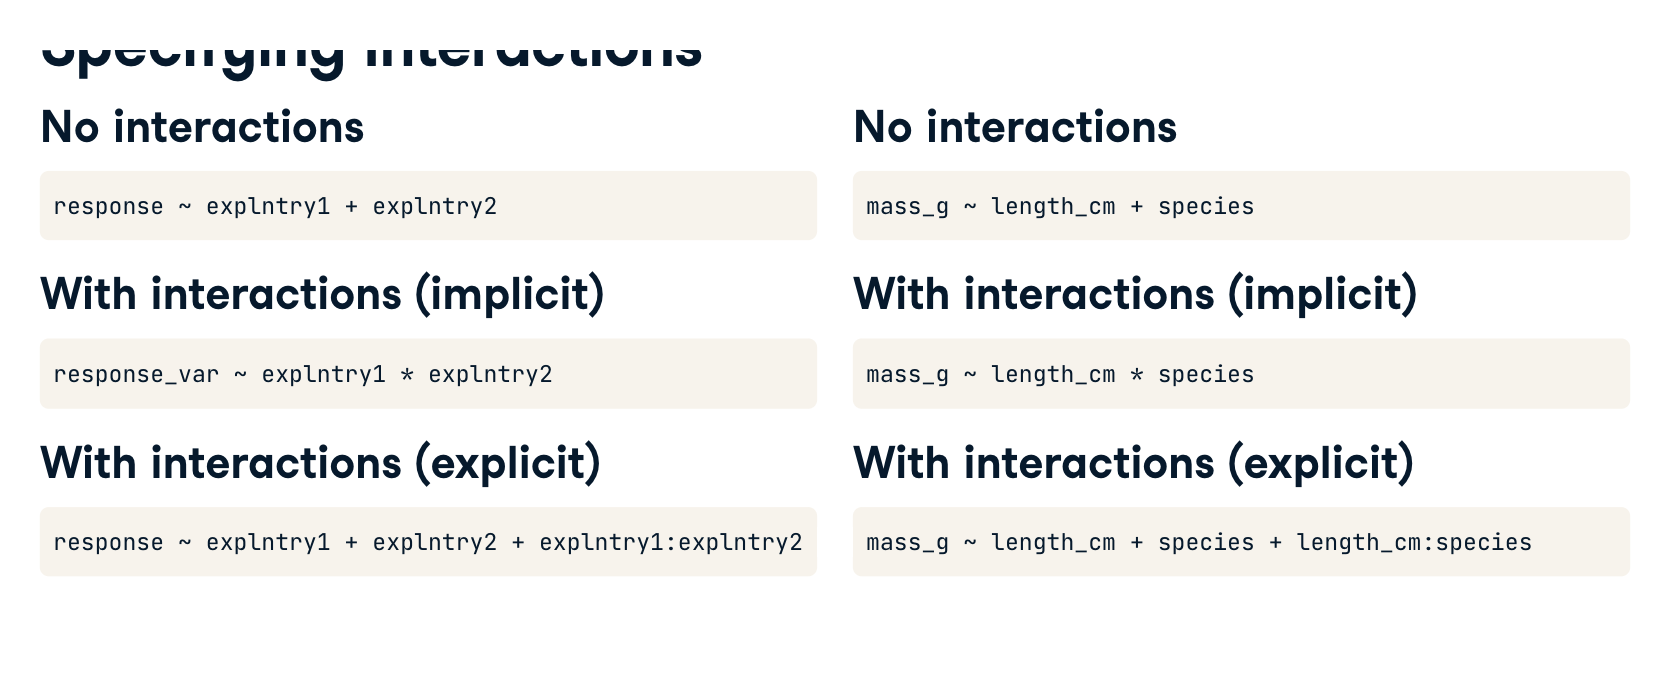

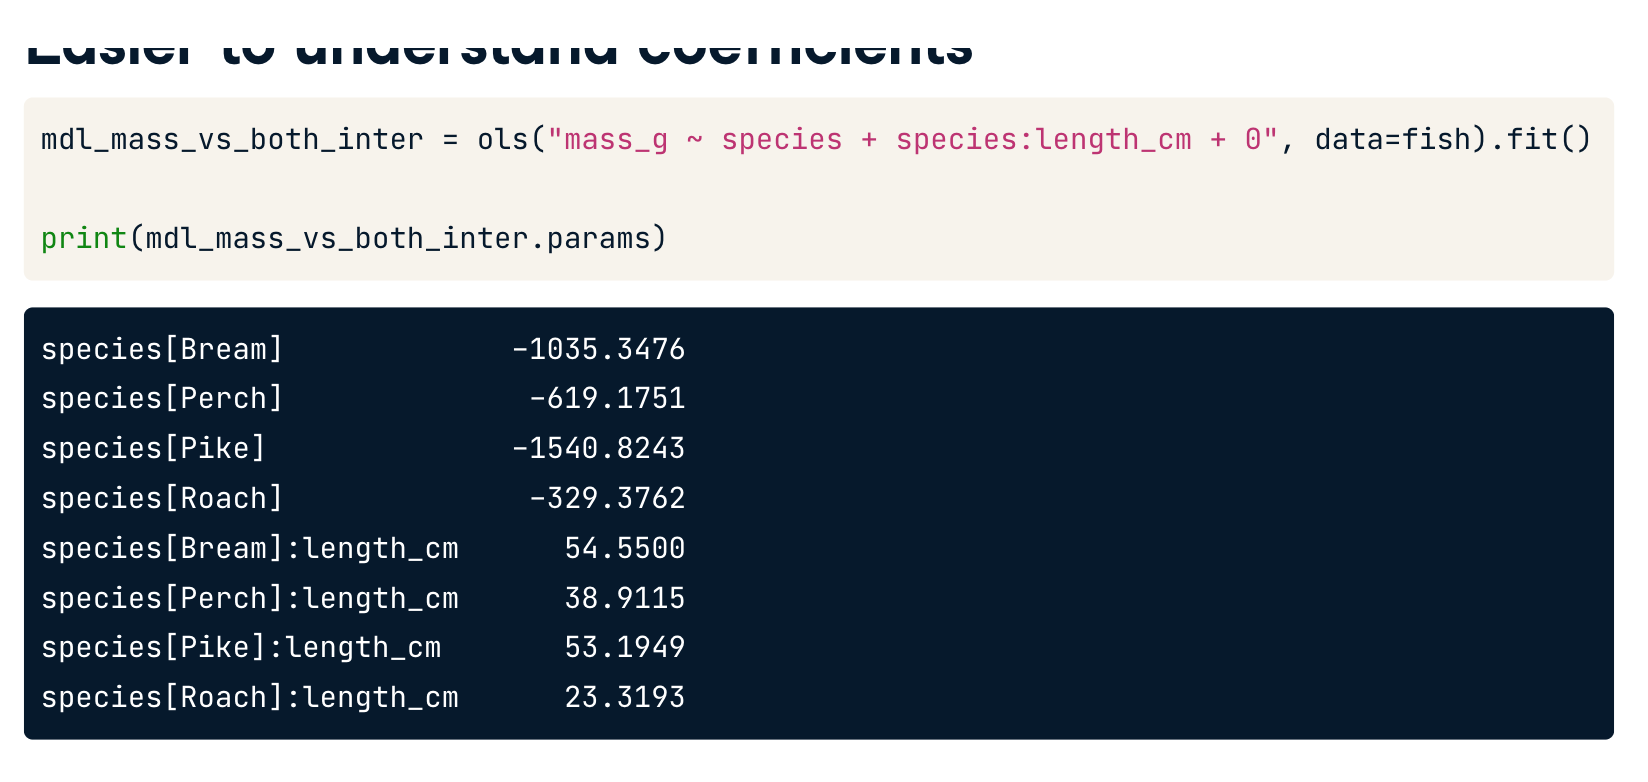
* Ironically, to get easier to understand coefficients, we need to make the formula harder to read. 
* This is the same model specified differently. 
* On the right-hand side of the formula, you can see the categorical explanatory variable, `species`, then an interaction between the two explanatory variables, then zero to remove the global intercept. 
* Now we get an intercept coefficient for each species and a slope coefficient for each species.

### Specifying an interaction
So far you've used a single parallel slopes model, which gave an OK fit for the whole dataset, then three separate models for each house age category, which gave a better fit for each individual category, but was clunky because you had three separate models to work with and explain. Ideally, you'd have a single model that had all the predictive power of the individual models.

Defining this single model is achieved through adding interactions between explanatory variables. The syntax of statsmodels.formula is flexible, and gives you a couple of options, depending on whether you prefer concise code that is quick to type and to read, or explicit code that describes what you are doing in detail.

In [31]:
# Model price vs both with an interaction using "times" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience * house_age_years', data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


* The formula should take the form `response_var ~ explanatory_var1 + explanatory_var2 + explanatory_var1:explanatory_var2`

In [34]:
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols('price_twd_msq ~ n_convenience + house_age_years + n_convenience:house_age_years', 
                              data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.params)

Intercept                                    9.241702
house_age_years[T.15 to 30]                 -2.369784
house_age_years[T.30 to 45]                 -1.128579
n_convenience                                0.833587
n_convenience:house_age_years[T.15 to 30]    0.018331
n_convenience:house_age_years[T.30 to 45]   -0.164889
dtype: float64


* Notice that the model coefficients are the same in each case. The formula syntax is very flexible, giving you a choice between 'easy to type' and 'very explicit', depending on your preference.

In [35]:
# Fit a linear regression of price_twd_msq versus house_age_years plus an interaction between n_convenience 
# and house_age_years, and no global intercept, using the taiwan_real_estate dataset.

mdl_readable_inter = ols('price_twd_msq ~ house_age_years + n_convenience:house_age_years + 0', 
                        data=taiwan_real_estate).fit()

# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params)

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params)

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_readable_inter coefficients:", "\n", mdl_readable_inter.params)

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64
mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64
mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_readable_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
n_convenience:house_age_years[0 to 15]     0.833587
n_convenience:house_age_years[15 to 30]    0.851917
n_convenience:house_age_years[30 to 45]    0.668698
dtype: float64


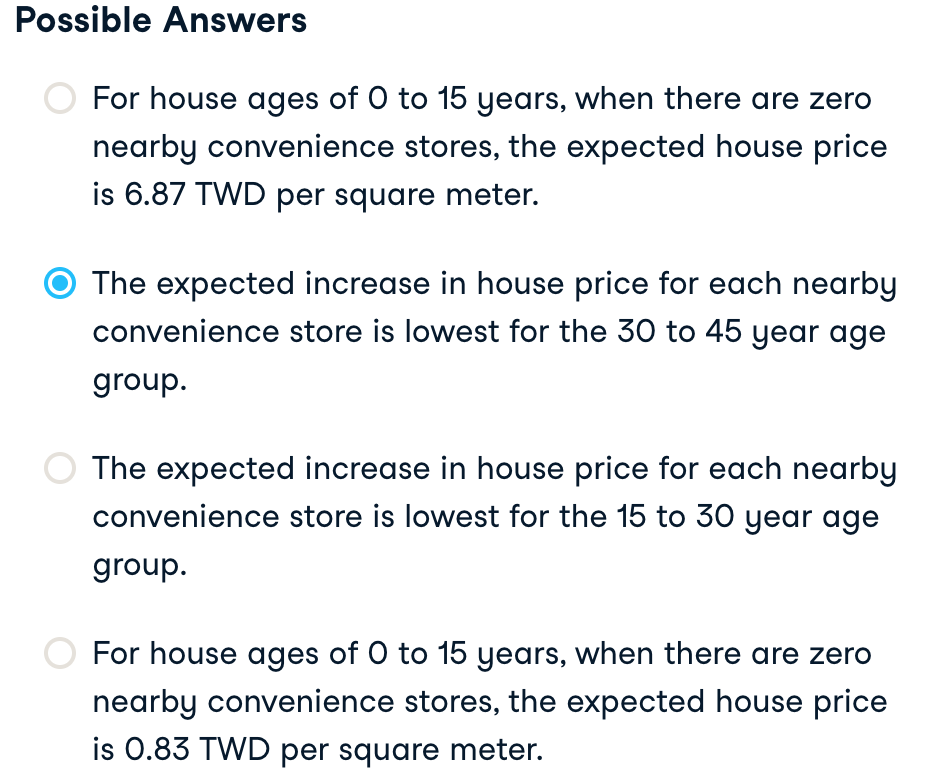
* In this version, you can see how each category has its own intercept and slope (just like the 3 separate models had).

<br>

### Predicting with interactions
As with every other regression model you've created, the fun part is making predictions. Fortunately, the code flow for this case is the same as the one without interactions — statsmodels can handle calculating the interactions without any extra prompting from you. The only thing you need to remember is the trick for getting combinations of explanatory variables.

In [42]:
# Create n_convenience as an array of number from 0 to 10
n_convenience = sorted(list(taiwan_real_estate['n_convenience'].unique()))

# Extract the unique values of house_age_years
house_age_years = sorted(list(taiwan_real_estate.house_age_years.unique()))

# Create p as all combination of values of n_convenience and house_age_years (previously imported product from iterttools)
p = product(n_convenience, house_age_years)

# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])

explanatory_data.head(10)

n_convenience house_age_years
0              0         0 to 15
1              0        15 to 30
2              0        30 to 45
3              1         0 to 15
4              1        15 to 30
5              1        30 to 45
6              2         0 to 15
7              2        15 to 30
8              2        30 to 45
9              3         0 to 15

In [44]:
# Add a column to the explanatory_data named price_twd_msq which contains 
# the predictions made using mdl_price_vs_both_inter and explanatory_data. Assign the result to prediction_data.

# Add prediction to the DataFrame
prediction_data = explanatory_data.assign(
        price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data)
)
display(prediction_data.head(10))

n_convenience house_age_years  price_twd_msq
0              0         0 to 15       9.241702
1              0        15 to 30       6.871919
2              0        30 to 45       8.113123
3              1         0 to 15      10.075289
4              1        15 to 30       7.723836
5              1        30 to 45       8.781822
6              2         0 to 15      10.908876
7              2        15 to 30       8.575753
8              2        30 to 45       9.450520
9              3         0 to 15      11.742462

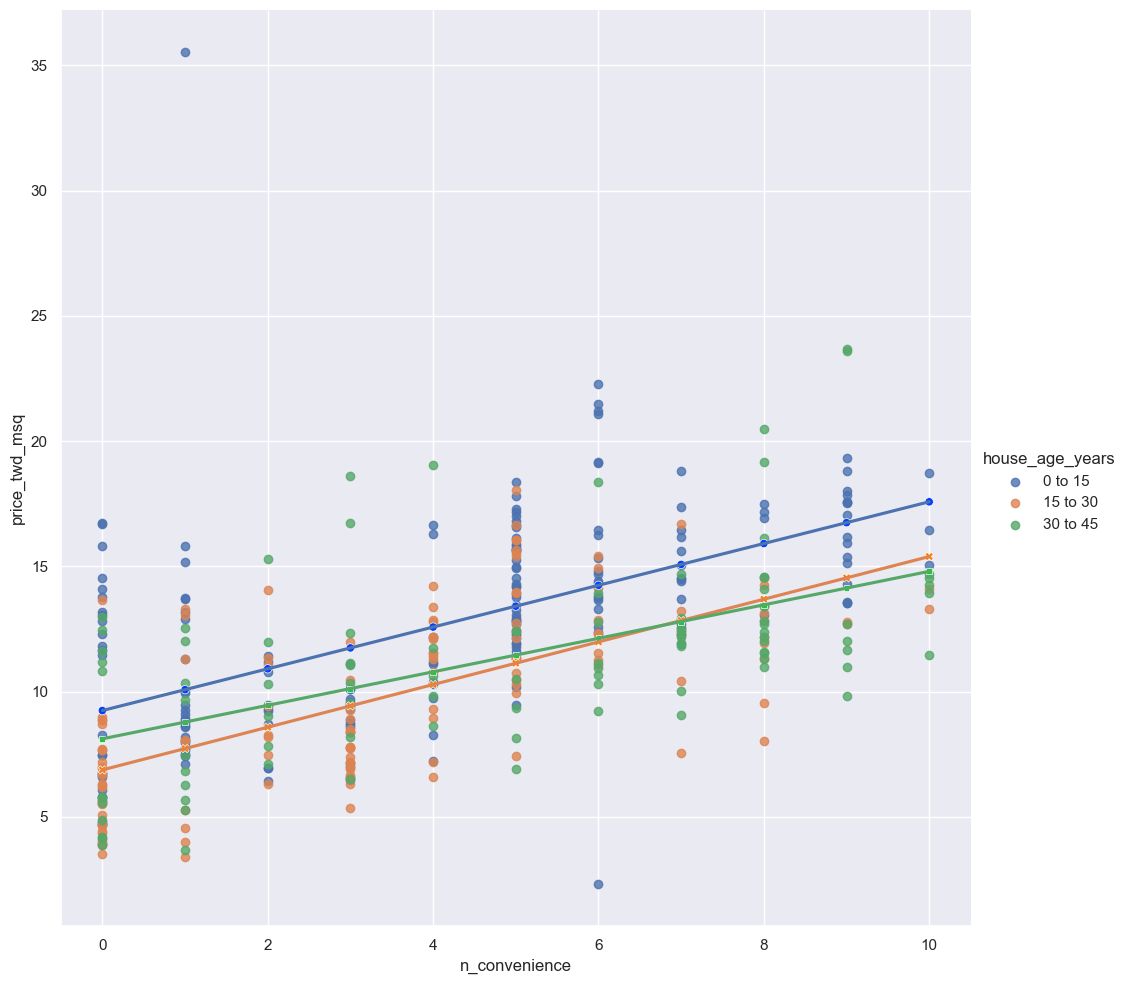

In [69]:
#sns.set(rc={'figure.figsize':(25,18)})
# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(
    x='n_convenience',
    y='price_twd_msq',
    hue='house_age_years',
    ci=None,
    data=taiwan_real_estate,
    hue_order=['0 to 15', '15 to 30', '30 to 45'],
    height=10,
    aspect=1
)

# Add a scatter plot for prediction_data (let's add the prediction dots in like corral or something)
sns.scatterplot(
    x='n_convenience',
    y='price_twd_msq',
    data=prediction_data,
    hue='house_age_years',
    hue_order=['0 to 15', '15 to 30', '30 to 45'],
    palette='bright',
    style='house_age_years',
    markers=True,
    legend=False)

# Show the plot
plt.show()

In [71]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create Conditions
conditions = [
    explanatory_data['house_age_years'] == '0 to 15',
    explanatory_data['house_age_years'] == '15 to 30',
    explanatory_data['house_age_years'] == '30 to 45'    
]

# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]

# Create Slope choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)

# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
    price_twd_msq = intercept + slope * explanatory_data["n_convenience"]
)

display(prediction_data.head())

n_convenience house_age_years  price_twd_msq
0              0         0 to 15       9.241702
1              0        15 to 30      -2.369784
2              0        30 to 45      -1.128579
3              1         0 to 15      10.075289
4              1        15 to 30      -2.351453

In [90]:
intercept_choices, slope_choices, mdl_price_vs_both_inter.params # declared choices

([9.241702232000065, -2.3697835905036433, -1.1285787369102833],
 [0.8335866819185865, 0.018330557556162974, -0.16488855213140538],
 Intercept                                    9.241702
 house_age_years[T.15 to 30]                 -2.369784
 house_age_years[T.30 to 45]                 -1.128579
 n_convenience                                0.833587
 n_convenience:house_age_years[T.15 to 30]    0.018331
 n_convenience:house_age_years[T.30 to 45]   -0.164889
 dtype: float64)

In [92]:
intercept, slope # how the correct values for the subsequent assignment to dataframe vectorizes (how assigned corretly for manual equation)



(array([ 9.24170223, -2.36978359, -1.12857874,  9.24170223, -2.36978359,
        -1.12857874,  9.24170223, -2.36978359, -1.12857874,  9.24170223,
        -2.36978359, -1.12857874,  9.24170223, -2.36978359, -1.12857874,
         9.24170223, -2.36978359, -1.12857874,  9.24170223, -2.36978359,
        -1.12857874,  9.24170223, -2.36978359, -1.12857874,  9.24170223,
        -2.36978359, -1.12857874,  9.24170223, -2.36978359, -1.12857874,
         9.24170223, -2.36978359, -1.12857874]),
 array([ 0.83358668,  0.01833056, -0.16488855,  0.83358668,  0.01833056,
        -0.16488855,  0.83358668,  0.01833056, -0.16488855,  0.83358668,
         0.01833056, -0.16488855,  0.83358668,  0.01833056, -0.16488855,
         0.83358668,  0.01833056, -0.16488855,  0.83358668,  0.01833056,
        -0.16488855,  0.83358668,  0.01833056, -0.16488855,  0.83358668,
         0.01833056, -0.16488855,  0.83358668,  0.01833056, -0.16488855,
         0.83358668,  0.01833056, -0.16488855]))

* Intercept and slope has used `np.select` to use the boolean conditions series (indicating if the row in explanatory data has the **house_age_years**) and if True, which matching intercept or slope to assign in the select's second argument or ordered intercept/slopes defined from the model's parameters

In [105]:
conditions[0][:10]

0     True
1    False
2    False
3     True
4    False
5    False
6     True
7    False
8    False
9     True
Name: house_age_years, dtype: bool

In [87]:
pd.Series(explanatory_data['house_age_years'] == '0 to 15')[:5]

0     True
1    False
2    False
3     True
4    False
Name: house_age_years, dtype: bool

* conditions is a boolean series return for each index indicating whether the column value for **house_age_years** in the `explanatory_data` dataframe is equal to a particular value

<br>

### Simpson's Paradox
* Sometimes modeling a whole dataset suggests trends that disagree with models on separate parts of that dataset. * This is known as `Simpson's paradox`. 
    * In the most extreme case, you may see a positive slope on the whole dataset, and negative slopes on every subset of that dataset (or the other way around).
* When the trend of a model on the whole dataset is very different from the trends shown by models on subsets of the dataset
    * trend = slope_coefficient

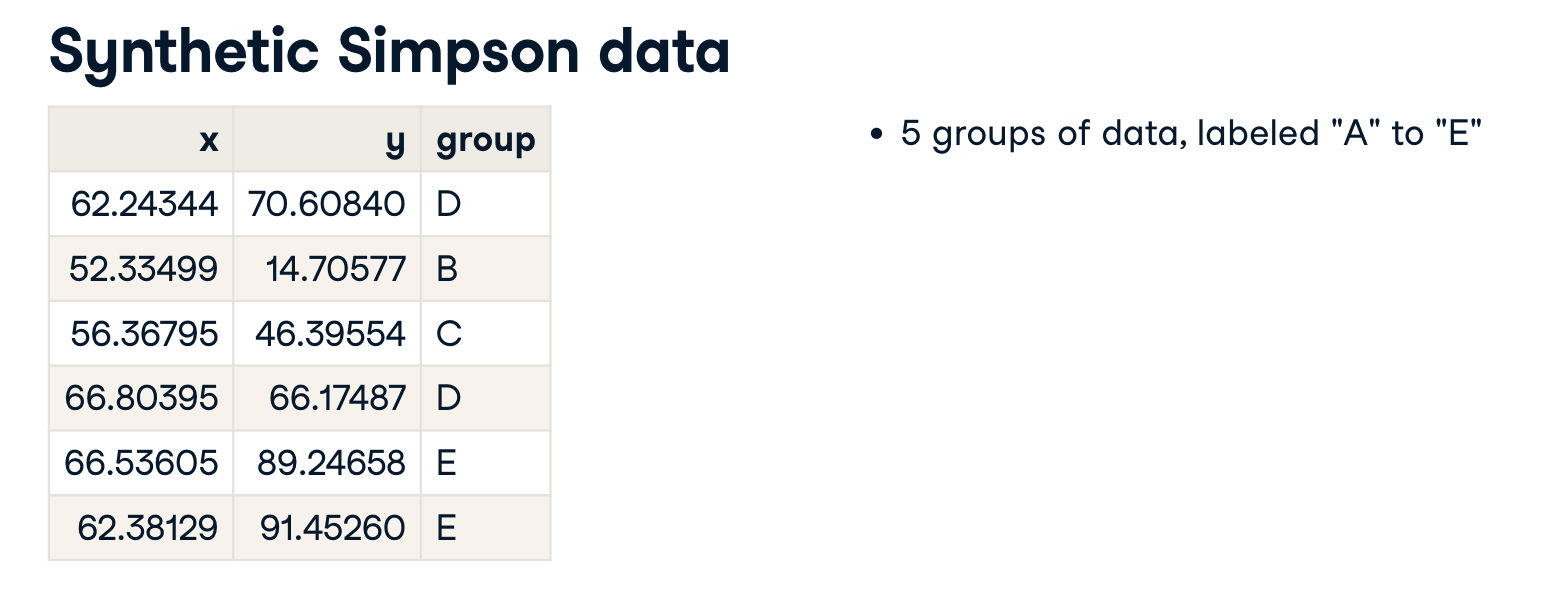

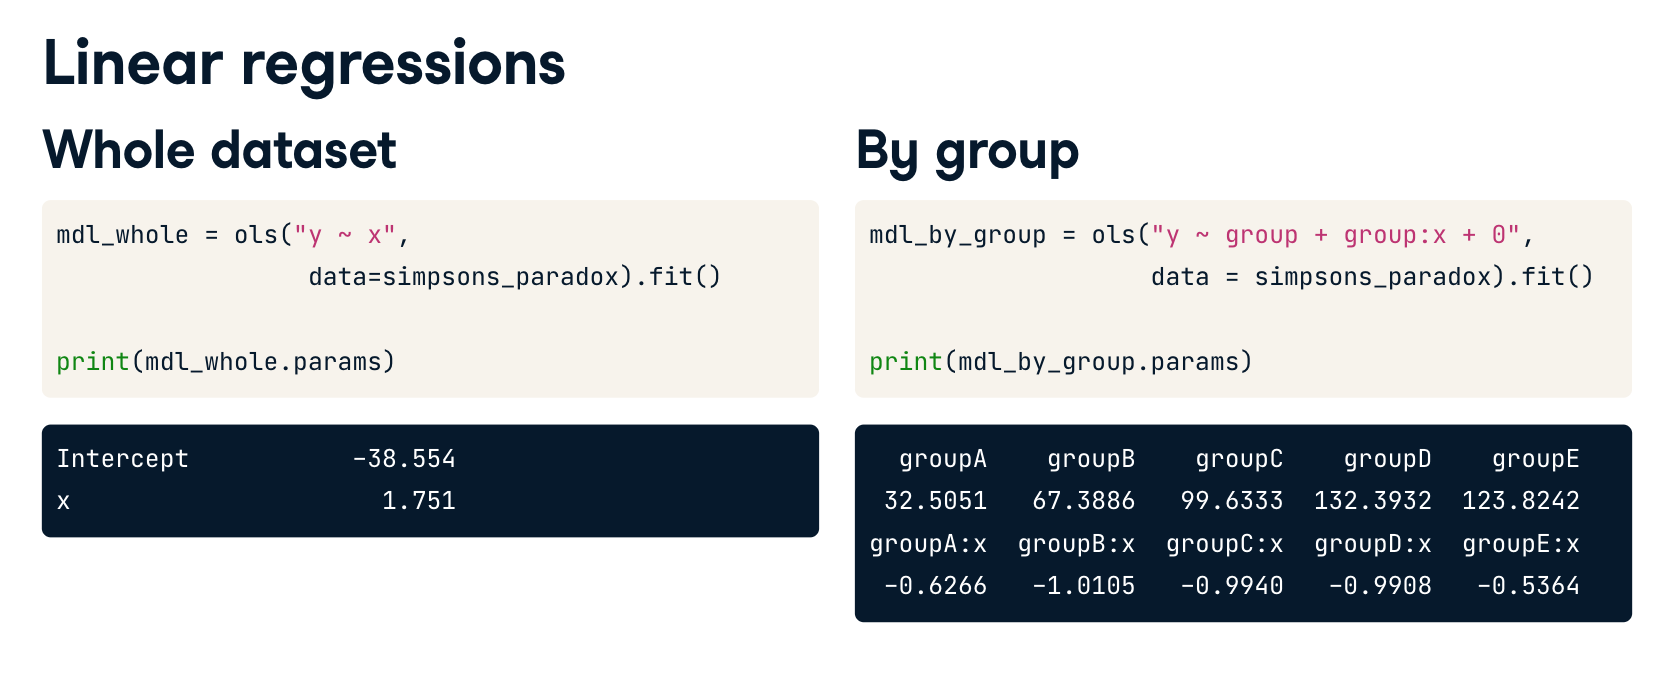
* Fitting a linear regression of y versus x to the whole dataset shows a positive slope of one point seven five. 
* However, fitting a model that includes the group and an interaction shows something completely different. 
    * The bottom row of coefficients contains the slope for each group. 
    * Every group has a negative slope, apparently contradicting the fact that the whole dataset has a positive slope.

In [109]:
# Look at the structure of the auctions dataset and familiarize yourself with its columns.
# Fit a linear regression model of price versus openbid, using the auctions dataset. Look at the coefficients.

auctions = pd.read_csv('../Datasets/auctions.csv')
display(auctions.info())

# Model prices vs opening bid using
mdl_price_vs_openbid = ols('price ~ openbid', data=auctions).fit()

# Look at model params
print(mdl_price_vs_openbid.params)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 343 entries, 0 to 342
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         343 non-null    float64
 1   openbid       343 non-null    float64
 2   auction_type  343 non-null    object 
dtypes: float64(2), object(1)
memory usage: 8.2+ KB


None

Intercept    229.245667
openbid       -0.002098
dtype: float64


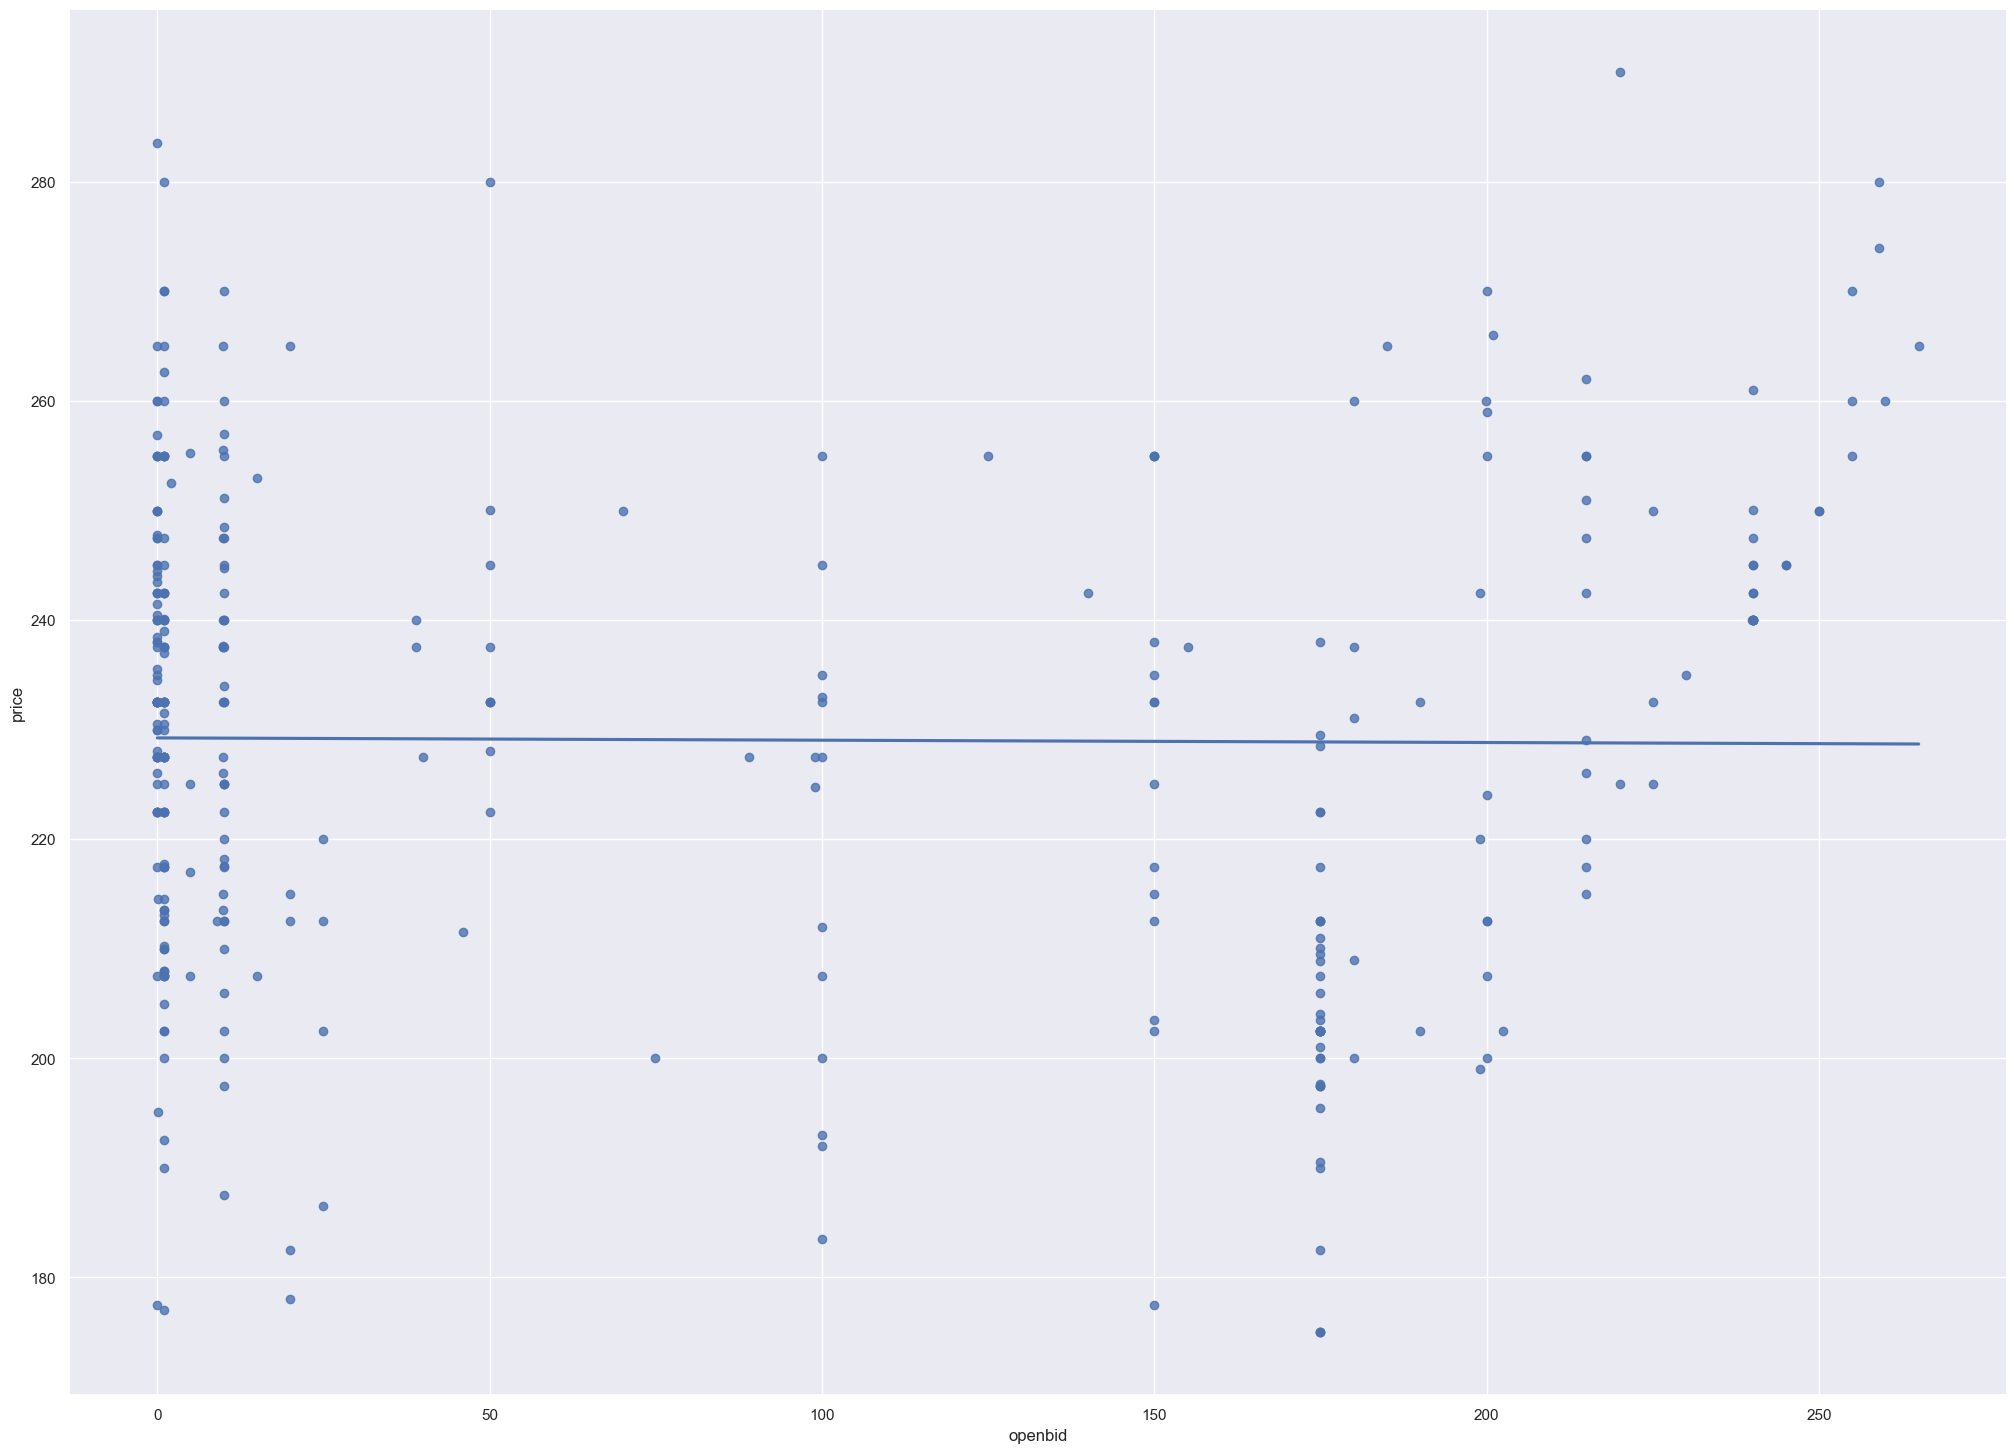

In [110]:
# Plot the scatter plot pf price vs. openbid with a linear trend line
sns.regplot(data=auctions,
            x='openbid',
            y='price',
            ci=None
)

# Show the plot
plt.show()

* The slope coefficient is small enough that it might as well be zero. That is, opening bid appears to have no effect on the final sale price for Palm Pilots.

In [111]:
# Fit a linear regression model of price versus openbid and auction_type, with an interaction between the explanatory variables, 
# without a global intercept term, and using the auctions dataset. Look at the coefficients.

mdl_price_vs_both = ols('price ~ openbid + auction_type + openbid:auction_type + 0', data=auctions).fit()

# See the result
print(mdl_price_vs_both.params)


auction_type[3 day auction]              226.369005
auction_type[5 day auction]              221.599320
auction_type[7 day auction]              231.602861
openbid                                   -0.029026
openbid:auction_type[T.5 day auction]      0.113040
openbid:auction_type[T.7 day auction]      0.032707
dtype: float64


In [112]:
auctions['auction_type'].value_counts()

7 day auction    194
3 day auction     95
5 day auction     54
Name: auction_type, dtype: int64

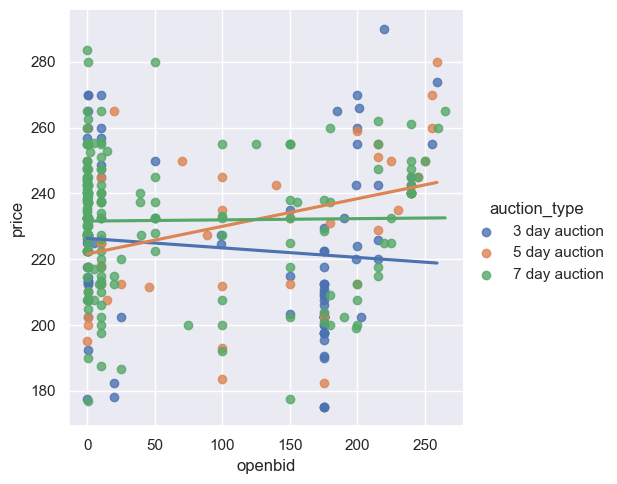

In [114]:
# Using auctions, plot price vs. opening bid colored by auction type as a scatter plot with linear regr'n trend lines
sns.lmplot(
    x='openbid',
    y='price',
    hue='auction_type',
    hue_order=['3 day auction', '5 day auction', '7 day auction'],
    ci=None,
    data=auctions
)

# Show the plot
plt.show()

#### Question / Simpson's Paradox
* Question : Which statement about the model resolves Simpson's Paradox?
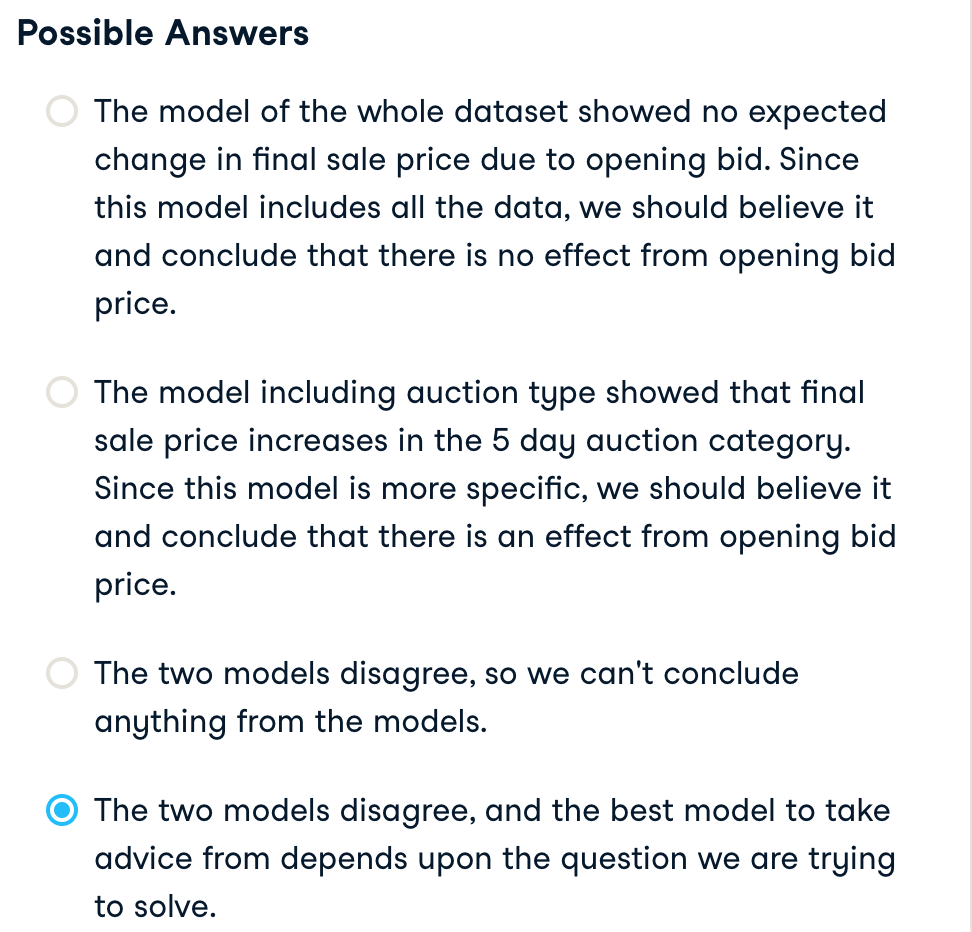

* Super Simpson solving! 
* Interpreting models is a subtle art, and your conclusions need to be based on the question you are trying to answer. 
* Here, the answer to `'Does opening bid affect final sale price?'` is no overall, but the answer to 'Does opening bid price affect final sale price for any type of auction?' is yes, for 5 day auctions.